In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import OneSidedSelection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset[1].csv')

In [ ]:

df

Unnamed: 0       Date Weather Station  Minimum Temperature  \
0                0  12/1/2008       Station 2                 13.4   
1                1  12/2/2008       Station 2                  7.4   
2                2  12/3/2008       Station 2                 12.9   
3                3  12/4/2008       Station 2                  9.2   
4                4  12/5/2008       Station 2                 17.5   
...            ...        ...             ...                  ...   
145455      145455  6/21/2017      Station 41                  2.8   
145456      145456  6/22/2017      Station 41                  3.6   
145457      145457  6/23/2017      Station 41                  5.4   
145458      145458  6/24/2017      Station 41                  7.8   
145459      145459  6/25/2017      Station 41                 14.9   

        Maximum Temperature  Rainfall  Evaporation  Sunshine Gust Trajectory  \
0                      22.9       0.6          NaN       NaN               W   
1                      25.1       0.0          NaN       NaN             WNW   
2                      25.7       0.0          NaN       NaN             WSW   
3                      28.0       0.0          NaN       NaN              NE   
4                      32.3       1.0          NaN       NaN               W   
...                     ...       ...          ...       ...             ...   
145455                 23.4       0.0          NaN       NaN               E   
145456                 25.3       0.0          NaN       NaN             NNW   
145457                 26.9       0.0          NaN       NaN               N   
145458                 27.0       0.0          NaN       NaN              SE   
145459                  NaN       0.0          NaN       NaN             NaN   

        Air Velocity  ... Moisture Level at 9 AM Moisture Level at 3 PM  \
0               44.0  ...                   71.0                   22.0   
1               44.0  ...                   44.0                   25.0   
2               46.0  ...                   38.0                   30.0   
3               24.0  ...                   45.0                   16.0   
4               41.0  ...                   82.0                   33.0   
...              ...  ...                    ...                    ...   
145455          31.0  ...                   51.0                   24.0   
145456          22.0  ...                   56.0                   21.0   
145457          37.0  ...                   53.0                   24.0   
145458          28.0  ...                   51.0                   24.0   
145459           NaN  ...                   62.0                   36.0   

        Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                             1007.7                        1007.1   
1                             1010.6                        1007.8   
2                             1007.6                        1008.7   
3                             1017.6                        1012.8   
4                             1010.8                        1006.0   
...                              ...                           ...   
145455                        1024.6                        1020.3   
145456                        1023.5                        1019.1   
145457                        1021.0                        1016.8   
145458                        1019.4                        1016.5   
145459                        1020.2                        1017.9   

        Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
0                      8.0                 NaN                          16.9   
1                      NaN                 NaN                          17.2   
2                      NaN                 2.0                          21.0   
3                      NaN                 NaN                          18.1   
4                      7.0                 8.0                  

In [ ]:
df.shape

(145460, 24)

In [ ]:

df.head()

Unnamed: 0       Date Weather Station  Minimum Temperature  \
0           0  12/1/2008       Station 2                 13.4   
1           1  12/2/2008       Station 2                  7.4   
2           2  12/3/2008       Station 2                 12.9   
3           3  12/4/2008       Station 2                  9.2   
4           4  12/5/2008       Station 2                 17.5   

   Maximum Temperature  Rainfall  Evaporation  Sunshine Gust Trajectory  \
0                 22.9       0.6          NaN       NaN               W   
1                 25.1       0.0          NaN       NaN             WNW   
2                 25.7       0.0          NaN       NaN             WSW   
3                 28.0       0.0          NaN       NaN              NE   
4                 32.3       1.0          NaN       NaN               W   

   Air Velocity  ... Moisture Level at 9 AM Moisture Level at 3 PM  \
0          44.0  ...                   71.0                   22.0   
1          44.0  ...                   44.0                   25.0   
2          46.0  ...                   38.0                   30.0   
3          24.0  ...                   45.0                   16.0   
4          41.0  ...                   82.0                   33.0   

   Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                        1007.7                        1007.1   
1                        1010.6                        1007.8   
2                        1007.6                        1008.7   
3                        1017.6                        1012.8   
4                        1010.8                        1006.0   

   Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
0                 8.0                 NaN                          16.9   
1                 NaN                 NaN                          17.2   
2                 NaN                 2.0                          21.0   
3                 NaN                 NaN                          18.1   
4                 7.0                 8.0                          17.8   

   Recorded Temperature at 3 PM  Rain that day  Rain the day after  
0                          21.8             No                  No  
1                          24.3             No                  No  
2                          23.2             No                  No  
3                          26.5             No                  No  
4                          29.7             No                  No  

[5 rows x 24 columns]

In [ ]:
df.tail()

Unnamed: 0       Date Weather Station  Minimum Temperature  \
145455      145455  6/21/2017      Station 41                  2.8   
145456      145456  6/22/2017      Station 41                  3.6   
145457      145457  6/23/2017      Station 41                  5.4   
145458      145458  6/24/2017      Station 41                  7.8   
145459      145459  6/25/2017      Station 41                 14.9   

        Maximum Temperature  Rainfall  Evaporation  Sunshine Gust Trajectory  \
145455                 23.4       0.0          NaN       NaN               E   
145456                 25.3       0.0          NaN       NaN             NNW   
145457                 26.9       0.0          NaN       NaN               N   
145458                 27.0       0.0          NaN       NaN              SE   
145459                  NaN       0.0          NaN       NaN             NaN   

        Air Velocity  ... Moisture Level at 9 AM Moisture Level at 3 PM  \
145455          31.0  ...                   51.0                   24.0   
145456          22.0  ...                   56.0                   21.0   
145457          37.0  ...                   53.0                   24.0   
145458          28.0  ...                   51.0                   24.0   
145459           NaN  ...                   62.0                   36.0   

        Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
145455                        1024.6                        1020.3   
145456                        1023.5                        1019.1   
145457                        1021.0                        1016.8   
145458                        1019.4                        1016.5   
145459                        1020.2                        1017.9   

        Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
145455                 NaN                 NaN                          10.1   
145456                 NaN                 NaN                          10.9   
145457                 NaN                 NaN                          12.5   
145458                 3.0                 2.0                          15.1   
145459                 8.0                 8.0                          15.0   

        Recorded Temperature at 3 PM  Rain that day  Rain the day after  
145455                          22.4             No                  No  
145456                          24.5             No                  No  
145457                          26.1             No                  No  
145458                          26.0             No                  No  
145459                          20.9             No                 NaN  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 AM         143693 non-nul

Removing irrelevant feature

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
# Showing we decreased the dimension of data points one unit
num_features = df.shape[1]
num_features


23

Number of data points(rows) with missing values

In [ ]:
df.isnull().any(axis = 1).sum()

89040

Number of features(columns) containing missing values


In [ ]:
df.isnull().any(axis = 0).sum()

21

Number of missing values(cells) in the dataFrame

In [ ]:
df.isnull().sum().sum()

343248

Number of duplicated rows in the dataframe

In [ ]:
df.duplicated().sum()

0

The percentage of null values in each column

In [ ]:
null_proportions = df.isnull().mean()
null_percentages = null_proportions * 100
print("Percentage of null values in each column : ")
for column, percentage in null_percentages.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values in each column : 
Date: 0.00%
Weather Station: 0.00%
Minimum Temperature: 1.02%
Maximum Temperature: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
Gust Trajectory: 7.10%
Air Velocity: 7.06%
Gust Trajectory at  9 AM: 7.26%
Gust Trajectory at  3 PM: 2.91%
Air Velocity at  9 AM: 1.21%
Air Velocity at  3 PM: 2.11%
Moisture Level at 9 AM: 1.82%
Moisture Level at 3 PM: 3.10%
Atmospheric Pressure at 9 AM: 10.36%
Atmospheric Pressure at 3 PM: 10.33%
Cloudiness at 9 AM: 38.42%
Cloudiness at 3 PM: 40.81%
Recorded Temperature at 9 AM: 1.21%
Recorded Temperature at 3 PM: 2.48%
Rain that day: 2.24%
Rain the day after: 2.25%


Date to datetime convert

In [ ]:
# Converting Date column into a useful datetime format and
# Extracting date components such as day, month and year
# Sorting the dataframe by the datetime column
df["datetime"] = pd.to_datetime(df["Date"])
df["Day"] = df["datetime"].dt.day
df["Month"] = df["datetime"].dt.month
df["Year"] = df["datetime"].dt.year
df = df.sort_values(by='datetime')

In [ ]:
# Showing the changes in dataframe
df

Date Weather Station  Minimum Temperature  Maximum Temperature  \
45587   11/1/2007       Station 9                  8.0                 24.3   
45588   11/2/2007       Station 9                 14.0                 26.9   
45589   11/3/2007       Station 9                 13.7                 23.4   
45590   11/4/2007       Station 9                 13.3                 15.5   
45591   11/5/2007       Station 9                  7.6                 16.1   
...           ...             ...                  ...                  ...   
64190   6/25/2017      Station 35                  0.1                 14.8   
67199   6/25/2017      Station 19                  5.5                 13.9   
70392   6/25/2017      Station 18                  8.6                 14.3   
123830  6/25/2017      Station 31                  6.3                 17.0   
145459  6/25/2017      Station 41                 14.9                  NaN   

        Rainfall  Evaporation  Sunshine Gust Trajectory  Air Velocity  \
45587        0.0          3.4       6.3              NW          30.0   
45588        3.6          4.4       9.7             ENE          39.0   
45589        3.6          5.8       3.3              NW          85.0   
45590       39.8          7.2       9.1              NW          54.0   
45591        2.8          5.6      10.6             SSE          50.0   
...          ...          ...       ...             ...           ...   
64190        0.0          NaN       NaN             NaN           NaN   
67199        0.0          2.8       3.8             NNW          44.0   
70392        0.0          2.8       3.8              NW          35.0   
123830       0.0          1.6       7.9               E          26.0   
145459       0.0          NaN       NaN             NaN           NaN   

       Gust Trajectory at  9 AM  ... Cloudiness at 9 AM  Cloudiness at 3 PM  \
45587                        SW  ...                7.0                 7.0   
45588                         E  ...                5.0                 3.0   
45589                         N  ...                8.0                 7.0   
45590                       WNW  ...                2.0                 7.0   
45591                       SSE  ...                7.0                 7.0   
...                         ...  ...                ...                 ...   
64190                       WNW  ...                NaN                 NaN   
67199                         N  ...                7.0                 7.0   
70392                         N  ...                7.0                 7.0   
123830                       SE  ...                1.0                 3.0   
145459                      ESE  ...                8.0                 8.0   

        Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
45587                           14.4                          23.6   
45588                           17.5                          25.7   
45589                           15.4                          20.2   
45590                           13.5                          14.1   
45591                           11.1                          15.4   
...                              ...                           ...   
64190                            5.9                          14.0   
67199                            8.1                          12.2   
70392                            9.3                          13.4   
123830                          11.5                          15.6   
145459                          15.0                          20.9   

        Rain that day  Rain the day after   datetime  Day  Month  Year  
45587              No                 Yes 2007-11-01    1     11  2007  
45588             Yes                 Yes 2007-11-02    2     11  2007  
45589             Yes                 Yes 2007-11-03    3     11  2007  
45590             Yes                 Yes 2007-11-04    4     11  2007  
45591             Yes           

Dropping the Date column from the dataframe

In [ ]:
df = df.drop("Date", axis=1)

df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["Year"] = df["datetime"].dt.year

Handling missing values in 'Rain that dat' feature

In [ ]:
df['Rain that day'] = df['Rain that day'].fillna(df['Rainfall'].apply(lambda x: 'No' if x == 0 else 'Yes'))

In [ ]:
print(df['Rain that day'].value_counts())
print("Number of non_null_values in Rain that day feature : ")
print(df['Rain that day'].value_counts().sum())

Rain that day
No     110319
Yes     35141
Name: count, dtype: int64
Number of non_null_values in Rain that day feature : 
145460


In [ ]:
null_proportions = df.isnull().mean()
null_percentages = null_proportions * 100
print("Percentage of null values in each column : ")
for column, percentage in null_percentages.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values in each column : 
Weather Station: 0.00%
Minimum Temperature: 1.02%
Maximum Temperature: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
Gust Trajectory: 7.10%
Air Velocity: 7.06%
Gust Trajectory at  9 AM: 7.26%
Gust Trajectory at  3 PM: 2.91%
Air Velocity at  9 AM: 1.21%
Air Velocity at  3 PM: 2.11%
Moisture Level at 9 AM: 1.82%
Moisture Level at 3 PM: 3.10%
Atmospheric Pressure at 9 AM: 10.36%
Atmospheric Pressure at 3 PM: 10.33%
Cloudiness at 9 AM: 38.42%
Cloudiness at 3 PM: 40.81%
Recorded Temperature at 9 AM: 1.21%
Recorded Temperature at 3 PM: 2.48%
Rain that day: 0.00%
Rain the day after: 2.25%
datetime: 0.00%
Day: 0.00%
Month: 0.00%
Year: 0.00%


In [ ]:
print(df['Rain the day after'].value_counts())
print("Number of non_null_values in Rain the day after feature : ")
print(df['Rain the day after'].value_counts().sum())
print("Number of null_values in Rain the day after feature : ")
print(df['Rain the day after'].isnull().sum())

Rain the day after
No     110316
Yes     31877
Name: count, dtype: int64
Number of non_null_values in Rain the day after feature : 
142193
Number of null_values in Rain the day after feature : 
3267


In [ ]:
colors = ["#10a0ff", "#cb4459"]

<ipython-input-24-7373f37c6683>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="Rain the day after", palette=colors)


<Axes: xlabel='Rain the day after', ylabel='count'>

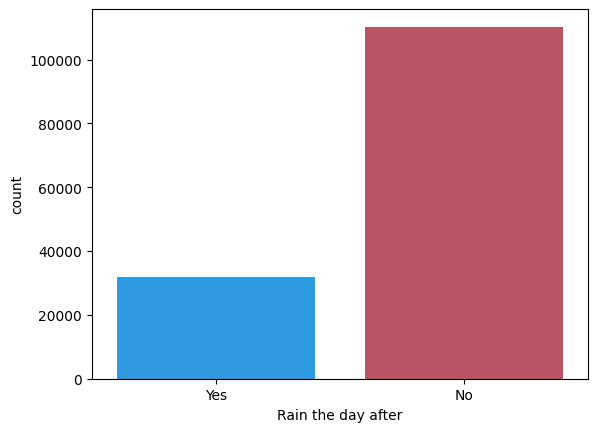

In [ ]:
sns.countplot(df, x="Rain the day after", palette=colors)

Doing sampling with different ratios

In [ ]:
  df1 = df.sample(frac=1, random_state=42)
  rainy_df1 = df1.loc[df['Rain the day after'] == "Yes"]
  non_rainy_df1 = df1.loc[df['Rain the day after'] == "No"][:int(31877 * 2)]
  normal_distributed_df1 = pd.concat([rainy_df1, non_rainy_df1])
  new_df1 = normal_distributed_df1.sample(frac=1, random_state=42)

  df2 = df.sample(frac=1, random_state=42)
  rainy_df2 = df2.loc[df['Rain the day after'] == "Yes"]
  non_rainy_df2 = df2.loc[df['Rain the day after'] == "No"][:int(31877 * 1.5)]
  normal_distributed_df2 = pd.concat([rainy_df2, non_rainy_df2])
  new_df2 = normal_distributed_df2.sample(frac=1, random_state=42)

  df3 = df.sample(frac=1, random_state=42)
  rainy_df3 = df3.loc[df['Rain the day after'] == "Yes"]
  non_rainy_df3 = df3.loc[df['Rain the day after'] == "No"][:int(31877 * 3)]
  normal_distributed_df3 = pd.concat([rainy_df3, non_rainy_df3])
  new_df3 = normal_distributed_df3.sample(frac=1, random_state=42)


<ipython-input-26-f260f257421b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(new_df1, x="Rain the day after", palette=colors)


<Axes: xlabel='Rain the day after', ylabel='count'>

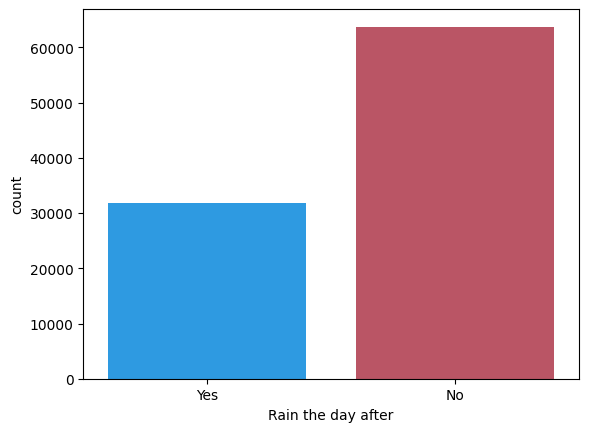

In [ ]:
sns.countplot(new_df1, x="Rain the day after", palette=colors)

<ipython-input-27-346fc22f55bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(new_df2, x="Rain the day after", palette=colors)


<Axes: xlabel='Rain the day after', ylabel='count'>

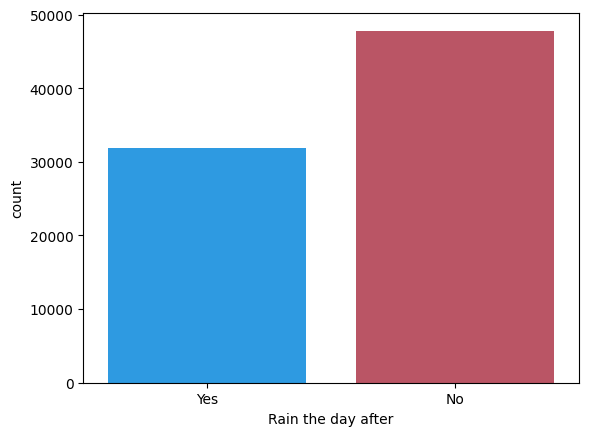

In [ ]:
sns.countplot(new_df2, x="Rain the day after", palette=colors)

<ipython-input-28-94ad8678fd3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(new_df3, x="Rain the day after", palette=colors)


<Axes: xlabel='Rain the day after', ylabel='count'>

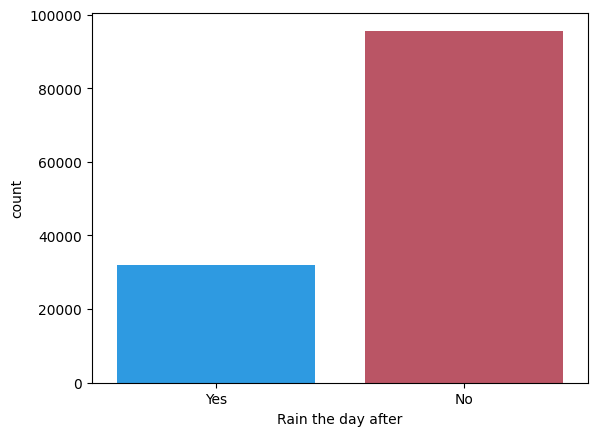

In [ ]:
sns.countplot(new_df3, x="Rain the day after", palette=colors)

In [ ]:
null_proportions_new_df1 = new_df1.isnull().mean()
null_percentages_new_df1 = null_proportions_new_df1 * 100
print("Percentage of null values(new_df1) in each column : ")
for column, percentage in null_percentages_new_df1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_new_df2 = new_df2.isnull().mean()
null_percentages_new_df2 = null_proportions_new_df2 * 100
print("Percentage of null values(new_df2) in each column : ")
for column, percentage in null_percentages_new_df2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_new_df3 = new_df3.isnull().mean()
null_percentages_new_df3 = null_proportions_new_df3 * 100
print("Percentage of null values(new_df3) in each column : ")
for column, percentage in null_percentages_new_df3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(new_df1) in each column : 
Weather Station: 0.00%
Minimum Temperature: 0.45%
Maximum Temperature: 0.23%
Rainfall: 1.14%
Evaporation: 42.95%
Sunshine: 47.63%
Gust Trajectory: 6.68%
Air Velocity: 6.63%
Gust Trajectory at  9 AM: 6.86%
Gust Trajectory at  3 PM: 2.77%
Air Velocity at  9 AM: 0.94%
Air Velocity at  3 PM: 1.89%
Moisture Level at 9 AM: 1.28%
Moisture Level at 3 PM: 2.62%
Atmospheric Pressure at 9 AM: 9.77%
Atmospheric Pressure at 3 PM: 9.76%
Cloudiness at 9 AM: 37.41%
Cloudiness at 3 PM: 39.60%
Recorded Temperature at 9 AM: 0.66%
Recorded Temperature at 3 PM: 1.98%
Rain that day: 0.00%
Rain the day after: 0.00%
datetime: 0.00%
Day: 0.00%
Month: 0.00%
Year: 0.00%
--------------------------------------
Percentage of null values(new_df2) in each column : 
Weather Station: 0.00%
Minimum Temperature: 0.46%
Maximum Temperature: 0.22%
Rainfall: 1.24%
Evaporation: 43.13%
Sunshine: 47.67%
Gust Trajectory: 6.77%
Air Velocity: 6.73%
Gust Trajectory at  9 AM: 6.77

In [ ]:
# sample 1
X1 = new_df1.drop("Rain the day after", axis=1)
Y1= new_df1["Rain the day after"]
# sample 2
X2 = new_df2.drop("Rain the day after", axis=1)
Y2= new_df2["Rain the day after"]
# sample 3
X3 = new_df3.drop("Rain the day after", axis=1)
Y3= new_df3["Rain the day after"]

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42, shuffle=True)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42, shuffle=True)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
df_train1 = pd.concat([X_train1, Y_train1], axis=1)
df_train2 = pd.concat([X_train2, Y_train2], axis=1)
df_train3 = pd.concat([X_train3, Y_train3], axis=1)

In [ ]:
#df_train1 = df_train1.sort_values(by='datetime')
#df_train2 = df_train2.sort_values(by='datetime')
#df_train3 = df_train3.sort_values(by='datetime')

In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76504 entries, 110377 to 136065
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Weather Station               76504 non-null  object        
 1   Minimum Temperature           76150 non-null  float64       
 2   Maximum Temperature           76331 non-null  float64       
 3   Rainfall                      75634 non-null  float64       
 4   Evaporation                   43691 non-null  float64       
 5   Sunshine                      40132 non-null  float64       
 6   Gust Trajectory               71400 non-null  object        
 7   Air Velocity                  71433 non-null  float64       
 8   Gust Trajectory at  9 AM      71225 non-null  object        
 9   Gust Trajectory at  3 PM      74399 non-null  object        
 10  Air Velocity at  9 AM         75783 non-null  float64       
 11  Air Velocity at  3 PM      

In [ ]:
df_train1 = df_train1.set_index(['Weather Station','Year','Month'])
df_train2 = df_train2.set_index(['Weather Station','Year','Month'])
df_train3 = df_train3.set_index(['Weather Station','Year','Month'])

In [ ]:
null_proportions_df_train1 = df_train1.isnull().mean()
null_percentages_df_train1 = null_proportions_df_train1 * 100
print("Percentage of null values(df_train1) in each column : ")
for column, percentage in null_percentages_df_train1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train2 = df_train2.isnull().mean()
null_percentages_df_train2 = null_proportions_df_train2 * 100
print("Percentage of null values(df_train2) in each column : ")
for column, percentage in null_percentages_df_train2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train3 = df_train3.isnull().mean()
null_percentages_df_train3 = null_proportions_df_train3 * 100
print("Percentage of null values(df_train3) in each column : ")
for column, percentage in null_percentages_df_train3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_train1) in each column : 
Minimum Temperature: 0.46%
Maximum Temperature: 0.23%
Rainfall: 1.14%
Evaporation: 42.89%
Sunshine: 47.54%
Gust Trajectory: 6.67%
Air Velocity: 6.63%
Gust Trajectory at  9 AM: 6.90%
Gust Trajectory at  3 PM: 2.75%
Air Velocity at  9 AM: 0.94%
Air Velocity at  3 PM: 1.88%
Moisture Level at 9 AM: 1.27%
Moisture Level at 3 PM: 2.61%
Atmospheric Pressure at 9 AM: 9.73%
Atmospheric Pressure at 3 PM: 9.73%
Cloudiness at 9 AM: 37.40%
Cloudiness at 3 PM: 39.50%
Recorded Temperature at 9 AM: 0.65%
Recorded Temperature at 3 PM: 1.96%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_train2) in each column : 
Minimum Temperature: 0.48%
Maximum Temperature: 0.22%
Rainfall: 1.28%
Evaporation: 43.10%
Sunshine: 47.62%
Gust Trajectory: 6.74%
Air Velocity: 6.69%
Gust Trajectory at  9 AM: 6.74%
Gust Trajectory at  3 PM: 2.81%
Air Velocity at  9 AM: 0.96%
Air 

# Preprocessing


## TrainingSets preprocess

### 3.1 Filling air temperature

<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

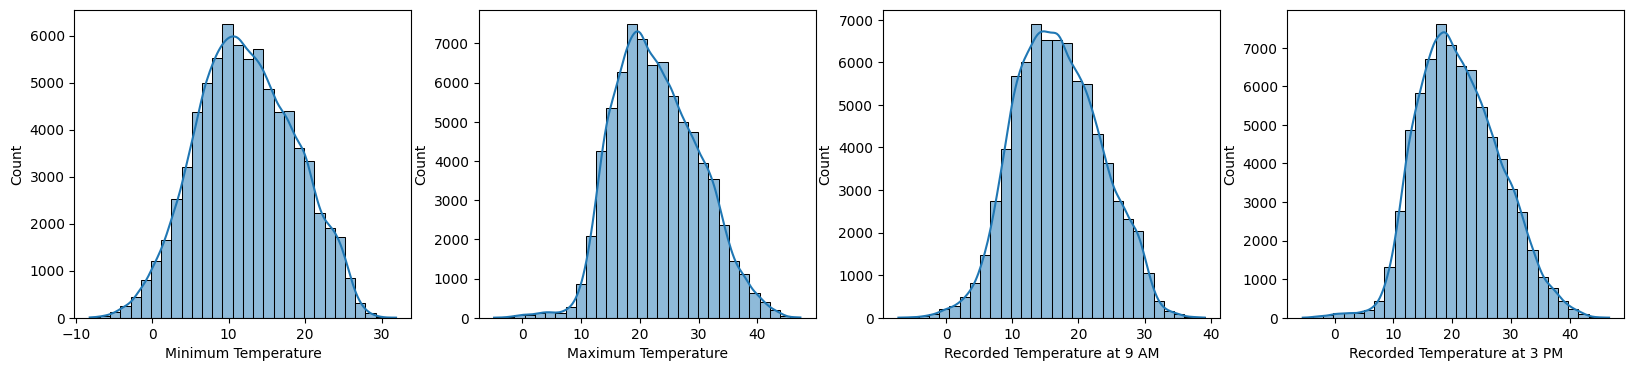

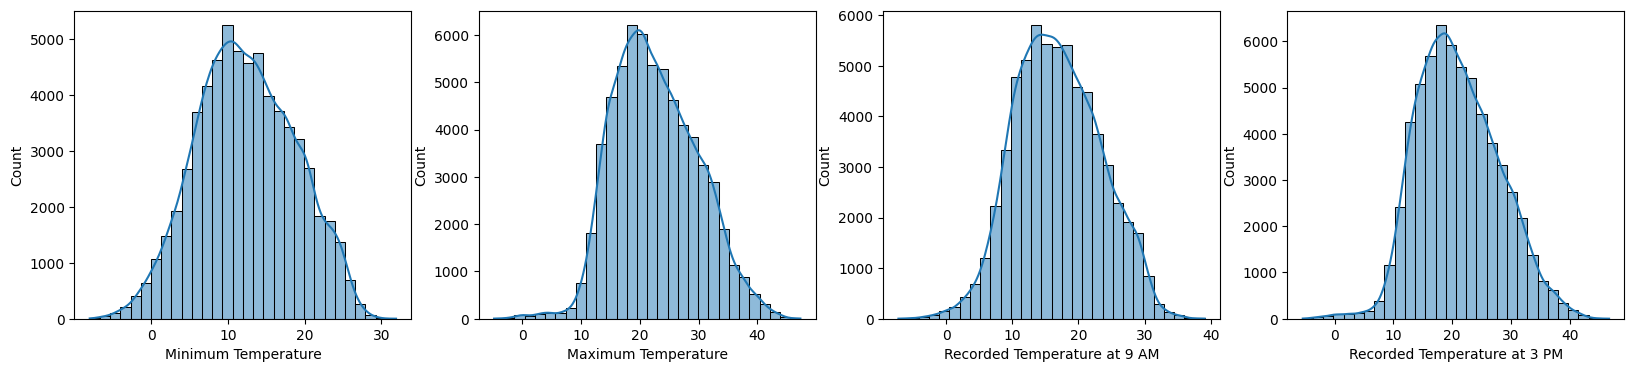

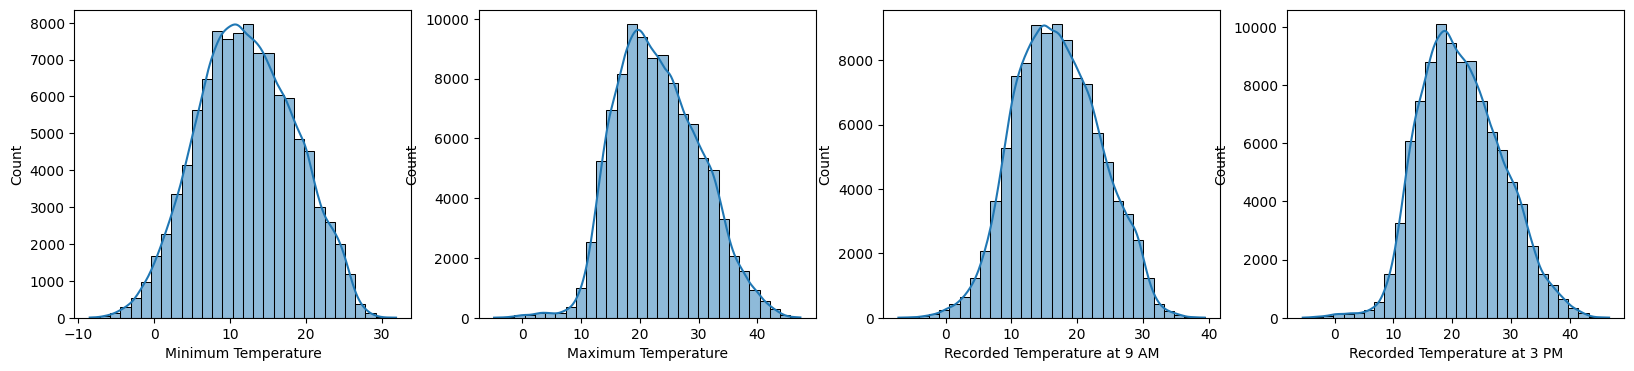

In [ ]:
# For sample 1
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train1["Minimum Temperature"], bins=30, kde=True,ax=axes[0])
sns.histplot(df_train1["Maximum Temperature"], bins=30, kde=True,ax=axes[1])
sns.histplot(df_train1["Recorded Temperature at 9 AM"], bins=30, kde=True,ax=axes[2])
sns.histplot(df_train1["Recorded Temperature at 3 PM"], bins=30, kde=True,ax=axes[3])
# For sample 2
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train2["Minimum Temperature"], bins=30, kde=True,ax=axes[0])
sns.histplot(df_train2["Maximum Temperature"], bins=30, kde=True,ax=axes[1])
sns.histplot(df_train2["Recorded Temperature at 9 AM"], bins=30, kde=True,ax=axes[2])
sns.histplot(df_train2["Recorded Temperature at 3 PM"], bins=30, kde=True,ax=axes[3])
# For sample 3
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train3["Minimum Temperature"], bins=30, kde=True,ax=axes[0])
sns.histplot(df_train3["Maximum Temperature"], bins=30, kde=True,ax=axes[1])
sns.histplot(df_train3["Recorded Temperature at 9 AM"], bins=30, kde=True,ax=axes[2])
sns.histplot(df_train3["Recorded Temperature at 3 PM"], bins=30, kde=True,ax=axes[3])

In [ ]:
min_temp_mean_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Minimum Temperature'].mean()
max_temp_mean_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Maximum Temperature'].mean()
recorded_temp_at_9_am_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 9 AM'].mean()
recorded_temp_at_3_pm_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 3 PM'].mean()
df_train1.update(pd.DataFrame(min_temp_mean_sample1,columns=["Minimum Temperature"]),overwrite=False)
df_train1.update(pd.DataFrame(max_temp_mean_sample1,columns=["Maximum Temperature"]),overwrite=False)
df_train1.update(pd.DataFrame(recorded_temp_at_9_am_sample1,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_train1.update(pd.DataFrame(recorded_temp_at_3_pm_sample1,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

min_temp_mean_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Minimum Temperature'].mean()
max_temp_mean_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Maximum Temperature'].mean()
recorded_temp_at_9_am_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 9 AM'].mean()
recorded_temp_at_3_pm_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 3 PM'].mean()
df_train2.update(pd.DataFrame(min_temp_mean_sample2,columns=["Minimum Temperature"]),overwrite=False)
df_train2.update(pd.DataFrame(max_temp_mean_sample2,columns=["Maximum Temperature"]),overwrite=False)
df_train2.update(pd.DataFrame(recorded_temp_at_9_am_sample2,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_train2.update(pd.DataFrame(recorded_temp_at_3_pm_sample2,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

min_temp_mean_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Minimum Temperature'].mean()
max_temp_mean_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Maximum Temperature'].mean()
recorded_temp_at_9_am_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 9 AM'].mean()
recorded_temp_at_3_pm_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Recorded Temperature at 3 PM'].mean()
df_train3.update(pd.DataFrame(min_temp_mean_sample3,columns=["Minimum Temperature"]),overwrite=False)
df_train3.update(pd.DataFrame(max_temp_mean_sample3,columns=["Maximum Temperature"]),overwrite=False)
df_train3.update(pd.DataFrame(recorded_temp_at_9_am_sample3,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_train3.update(pd.DataFrame(recorded_temp_at_3_pm_sample3,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

In [ ]:
null_proportions_df_train1 = df_train1.isnull().mean()
null_percentages_df_train1 = null_proportions_df_train1 * 100
print("Percentage of null values(df_train1) in each column : ")
for column, percentage in null_percentages_df_train1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train2 = df_train2.isnull().mean()
null_percentages_df_train2 = null_proportions_df_train2 * 100
print("Percentage of null values(df_train2) in each column : ")
for column, percentage in null_percentages_df_train2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train3 = df_train3.isnull().mean()
null_percentages_df_train3 = null_proportions_df_train3 * 100
print("Percentage of null values(df_train3) in each column : ")
for column, percentage in null_percentages_df_train3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_train1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.14%
Evaporation: 42.89%
Sunshine: 47.54%
Gust Trajectory: 6.67%
Air Velocity: 6.63%
Gust Trajectory at  9 AM: 6.90%
Gust Trajectory at  3 PM: 2.75%
Air Velocity at  9 AM: 0.94%
Air Velocity at  3 PM: 1.88%
Moisture Level at 9 AM: 1.27%
Moisture Level at 3 PM: 2.61%
Atmospheric Pressure at 9 AM: 9.73%
Atmospheric Pressure at 3 PM: 9.73%
Cloudiness at 9 AM: 37.40%
Cloudiness at 3 PM: 39.50%
Recorded Temperature at 9 AM: 0.02%
Recorded Temperature at 3 PM: 1.44%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_train2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.28%
Evaporation: 43.10%
Sunshine: 47.62%
Gust Trajectory: 6.74%
Air Velocity: 6.69%
Gust Trajectory at  9 AM: 6.74%
Gust Trajectory at  3 PM: 2.81%
Air Velocity at  9 AM: 0.96%
Air 

In [ ]:
df_train1[['Recorded Temperature at 3 PM']] = df_train1[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train1[['Recorded Temperature at 3 PM']] = df_train1[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train1[['Recorded Temperature at 9 AM']] = df_train1[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train1[['Recorded Temperature at 9 AM']] = df_train1[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train1[['Minimum Temperature']] = df_train1[['Minimum Temperature']].fillna(method='bfill')
df_train1[['Minimum Temperature']] = df_train1[['Minimum Temperature']].fillna(method='ffill')
df_train1[['Maximum Temperature']] = df_train1[['Maximum Temperature']].fillna(method='bfill')
df_train1[['Maximum Temperature']] = df_train1[['Maximum Temperature']].fillna(method='ffill')








df_train2[['Recorded Temperature at 3 PM']] = df_train2[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train2[['Recorded Temperature at 3 PM']] = df_train2[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train2[['Recorded Temperature at 9 AM']] = df_train2[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train2[['Recorded Temperature at 9 AM']] = df_train2[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train2[['Minimum Temperature']] = df_train2[['Minimum Temperature']].fillna(method='bfill')
df_train2[['Minimum Temperature']] = df_train2[['Minimum Temperature']].fillna(method='ffill')
df_train2[['Maximum Temperature']] = df_train2[['Maximum Temperature']].fillna(method='bfill')
df_train2[['Maximum Temperature']] = df_train2[['Maximum Temperature']].fillna(method='ffill')






df_train3[['Recorded Temperature at 3 PM']] = df_train3[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train3[['Recorded Temperature at 3 PM']] = df_train3[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train3[['Recorded Temperature at 9 AM']] = df_train3[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train3[['Recorded Temperature at 9 AM']] = df_train3[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train3[['Minimum Temperature']] = df_train3[['Minimum Temperature']].fillna(method='bfill')
df_train3[['Minimum Temperature']] = df_train3[['Minimum Temperature']].fillna(method='ffill')
df_train3[['Maximum Temperature']] = df_train3[['Maximum Temperature']].fillna(method='bfill')
df_train3[['Maximum Temperature']] = df_train3[['Maximum Temperature']].fillna(method='ffill')





In [ ]:
null_proportions_df_train1 = df_train1.isnull().mean()
null_percentages_df_train1 = null_proportions_df_train1 * 100
print("Percentage of null values(df_train1) in each column : ")
for column, percentage in null_percentages_df_train1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train2 = df_train2.isnull().mean()
null_percentages_df_train2 = null_proportions_df_train2 * 100
print("Percentage of null values(df_train2) in each column : ")
for column, percentage in null_percentages_df_train2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train3 = df_train3.isnull().mean()
null_percentages_df_train3 = null_proportions_df_train3 * 100
print("Percentage of null values(df_train3) in each column : ")
for column, percentage in null_percentages_df_train3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_train1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.14%
Evaporation: 42.89%
Sunshine: 47.54%
Gust Trajectory: 6.67%
Air Velocity: 6.63%
Gust Trajectory at  9 AM: 6.90%
Gust Trajectory at  3 PM: 2.75%
Air Velocity at  9 AM: 0.94%
Air Velocity at  3 PM: 1.88%
Moisture Level at 9 AM: 1.27%
Moisture Level at 3 PM: 2.61%
Atmospheric Pressure at 9 AM: 9.73%
Atmospheric Pressure at 3 PM: 9.73%
Cloudiness at 9 AM: 37.40%
Cloudiness at 3 PM: 39.50%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_train2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.28%
Evaporation: 43.10%
Sunshine: 47.62%
Gust Trajectory: 6.74%
Air Velocity: 6.69%
Gust Trajectory at  9 AM: 6.74%
Gust Trajectory at  3 PM: 2.81%
Air Velocity at  9 AM: 0.96%
Air 

<Axes: xlabel='Moisture Level at 3 PM', ylabel='Count'>

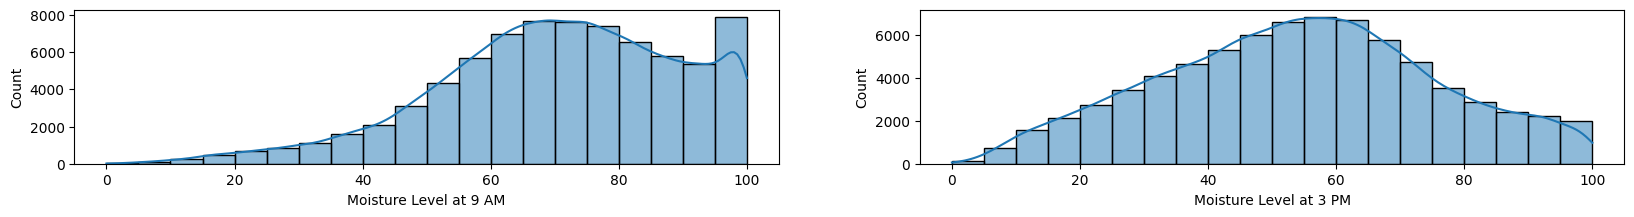

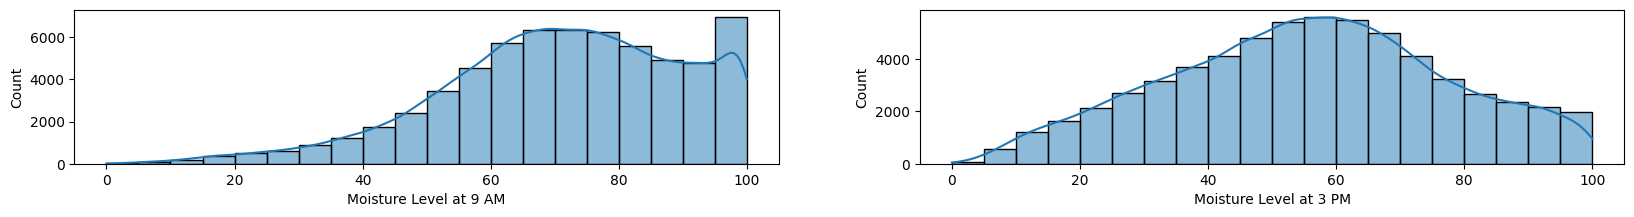

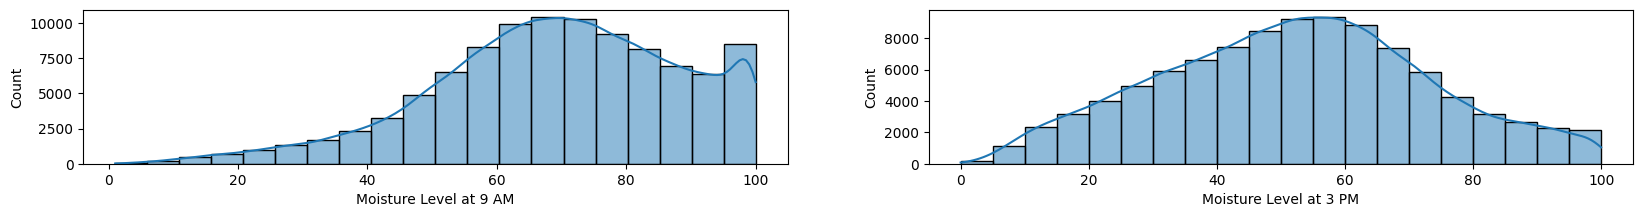

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train1["Moisture Level at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train1["Moisture Level at 3 PM"], bins=20, kde=True,ax=axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train2["Moisture Level at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train2["Moisture Level at 3 PM"], bins=20, kde=True,ax=axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train3["Moisture Level at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train3["Moisture Level at 3 PM"], bins=20, kde=True,ax=axes[1])

In [ ]:
print(df_train1[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_train2[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_train3[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())

Moisture Level at 9 AM     973
Moisture Level at 3 PM    1993
dtype: int64
Moisture Level at 9 AM     834
Moisture Level at 3 PM    1689
dtype: int64
Moisture Level at 9 AM    1285
Moisture Level at 3 PM    2550
dtype: int64


In [ ]:
null_proportions_df_train1 = df_train1.isnull().mean()
null_percentages_df_train1 = null_proportions_df_train1 * 100
print("Percentage of null values(df_train1) in each column : ")
for column, percentage in null_percentages_df_train1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train2 = df_train2.isnull().mean()
null_percentages_df_train2 = null_proportions_df_train2 * 100
print("Percentage of null values(df_train2) in each column : ")
for column, percentage in null_percentages_df_train2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train3 = df_train3.isnull().mean()
null_percentages_df_train3 = null_proportions_df_train3 * 100
print("Percentage of null values(df_train3) in each column : ")
for column, percentage in null_percentages_df_train3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_train1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.14%
Evaporation: 42.89%
Sunshine: 47.54%
Gust Trajectory: 6.67%
Air Velocity: 6.63%
Gust Trajectory at  9 AM: 6.90%
Gust Trajectory at  3 PM: 2.75%
Air Velocity at  9 AM: 0.94%
Air Velocity at  3 PM: 1.88%
Moisture Level at 9 AM: 1.27%
Moisture Level at 3 PM: 2.61%
Atmospheric Pressure at 9 AM: 9.73%
Atmospheric Pressure at 3 PM: 9.73%
Cloudiness at 9 AM: 37.40%
Cloudiness at 3 PM: 39.50%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_train2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.28%
Evaporation: 43.10%
Sunshine: 47.62%
Gust Trajectory: 6.74%
Air Velocity: 6.69%
Gust Trajectory at  9 AM: 6.74%
Gust Trajectory at  3 PM: 2.81%
Air Velocity at  9 AM: 0.96%
Air 

In [ ]:
# For sample 1
# Moisture Level at 3pm
moisture_level_train_filler_3pm_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Moisture Level at 3 PM'].median()
moisture_level_train_filler_3pm_sample1 = pd.DataFrame(moisture_level_train_filler_3pm_sample1.fillna(method='ffill'),columns=["Moisture Level at 3 PM"])
moisture_level_train_filler_3pm_sample1 = pd.DataFrame(moisture_level_train_filler_3pm_sample1.fillna(method='bfill'),columns=["Moisture Level at 3 PM"])
df_train1.update(moisture_level_train_filler_3pm_sample1,overwrite=False)
# Moisture Level at 9am
moisture_level_train_filler_9am_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Moisture Level at 9 AM'].median()
moisture_level_train_filler_9am_sample1 = pd.DataFrame(moisture_level_train_filler_9am_sample1.fillna(method='ffill'),columns=["Moisture Level at 9 AM"])
moisture_level_train_filler_9am_sample1 = pd.DataFrame(moisture_level_train_filler_9am_sample1.fillna(method='bfill'),columns=["Moisture Level at 9 AM"])
df_train1.update(moisture_level_train_filler_9am_sample1,overwrite=False)

# For sample 2
# Moisture Level at 3pm
moisture_level_train_filler_3pm_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Moisture Level at 3 PM'].median()
moisture_level_train_filler_3pm_sample2 = pd.DataFrame(moisture_level_train_filler_3pm_sample2.fillna(method='ffill'),columns=["Moisture Level at 3 PM"])
moisture_level_train_filler_3pm_sample2 = pd.DataFrame(moisture_level_train_filler_3pm_sample2.fillna(method='bfill'),columns=["Moisture Level at 3 PM"])
df_train2.update(moisture_level_train_filler_3pm_sample2,overwrite=False)
# Moisture Level at 9am
moisture_level_train_filler_9am_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Moisture Level at 9 AM'].median()
moisture_level_train_filler_9am_sample2 = pd.DataFrame(moisture_level_train_filler_9am_sample2.fillna(method='ffill'),columns=["Moisture Level at 9 AM"])
moisture_level_train_filler_9am_sample2 = pd.DataFrame(moisture_level_train_filler_9am_sample2.fillna(method='bfill'),columns=["Moisture Level at 9 AM"])
df_train2.update(moisture_level_train_filler_9am_sample2,overwrite=False)




# For sample 3
# Moisture Level at 3pm
moisture_level_train_filler_3pm_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Moisture Level at 3 PM'].median()
moisture_level_train_filler_3pm_sample3 = pd.DataFrame(moisture_level_train_filler_3pm_sample3.fillna(method='ffill'),columns=["Moisture Level at 3 PM"])
moisture_level_train_filler_3pm_sample3 = pd.DataFrame(moisture_level_train_filler_3pm_sample3.fillna(method='bfill'),columns=["Moisture Level at 3 PM"])
df_train3.update(moisture_level_train_filler_3pm_sample3,overwrite=False)
# Moisture Level at 9am
moisture_level_train_filler_9am_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Moisture Level at 9 AM'].median()
moisture_level_train_filler_9am_sample3 = pd.DataFrame(moisture_level_train_filler_9am_sample3.fillna(method='ffill'),columns=["Moisture Level at 9 AM"])
moisture_level_train_filler_9am_sample3 = pd.DataFrame(moisture_level_train_filler_9am_sample3.fillna(method='bfill'),columns=["Moisture Level at 9 AM"])
df_train3.update(moisture_level_train_filler_9am_sample3,overwrite=False)









In [ ]:
print(df_train1[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_train2[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_train3[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())

Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64
Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64
Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64


<Axes: xlabel='Rainfall', ylabel='Count'>

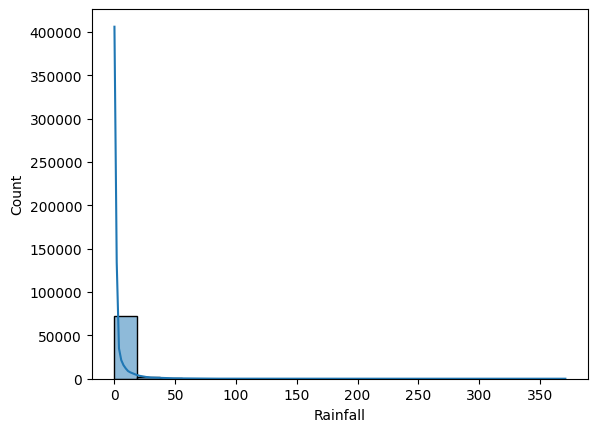

In [ ]:
sns.histplot(df_train1["Rainfall"], bins=20, kde=True)

<Axes: xlabel='Rainfall', ylabel='Count'>

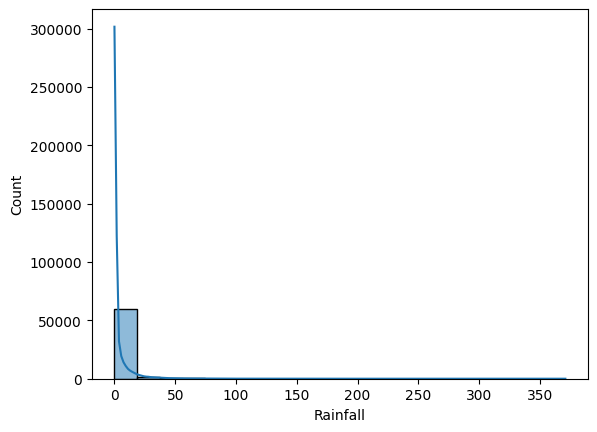

In [ ]:
sns.histplot(df_train2["Rainfall"], bins=20, kde=True)

In [ ]:
from sklearn.impute import KNNImputer
rainfall_imputer_df_train1 = KNNImputer(n_neighbors=5)
rainfall_imputer_df_train1.fit_transform(df_train1[["Rainfall"]])
df_train1["Rainfall"] = rainfall_imputer_df_train1.fit_transform(df_train1[["Rainfall"]])

from sklearn.impute import KNNImputer
rainfall_imputer_df_train2 = KNNImputer(n_neighbors=5)
rainfall_imputer_df_train2.fit_transform(df_train2[["Rainfall"]])
df_train2["Rainfall"] = rainfall_imputer_df_train2.fit_transform(df_train2[["Rainfall"]])

from sklearn.impute import KNNImputer
rainfall_imputer_df_train3 = KNNImputer(n_neighbors=5)
rainfall_imputer_df_train3.fit_transform(df_train3[["Rainfall"]])
df_train3["Rainfall"] = rainfall_imputer_df_train3.fit_transform(df_train3[["Rainfall"]])


In [ ]:
print(df_train1["Rainfall"].isnull().sum())
print(df_train2["Rainfall"].isnull().sum())
print(df_train3["Rainfall"].isnull().sum())

0
0
0


<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

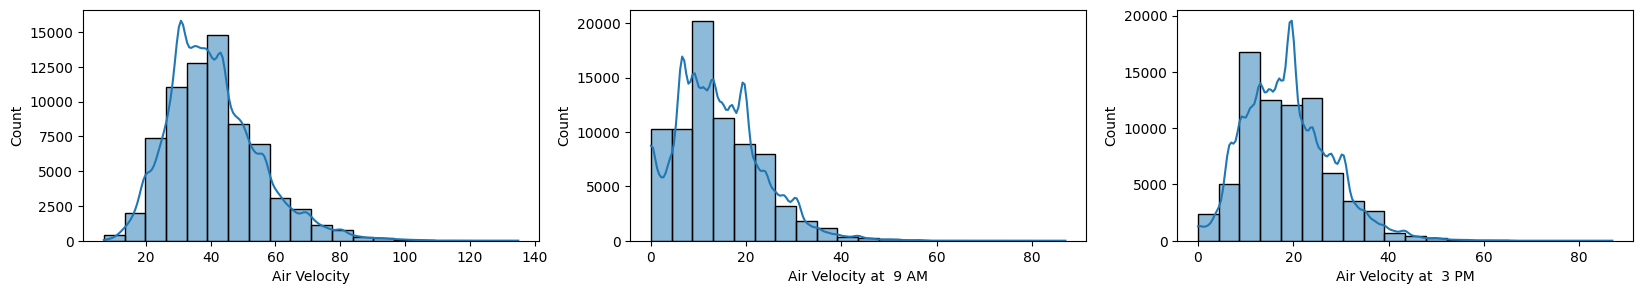

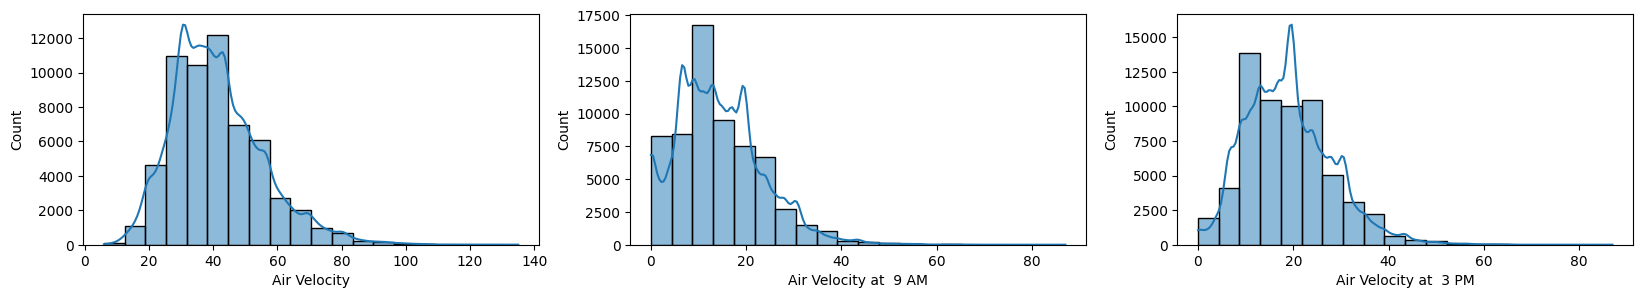

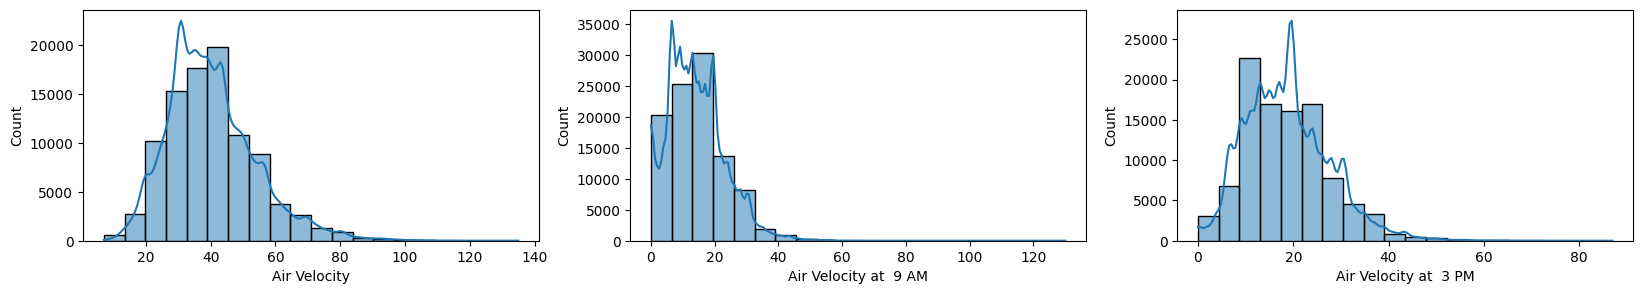

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_train1["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train1["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_train1["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_train2["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train2["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_train2["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_train3["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train3["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_train3["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])


In [ ]:
# Air Velocity
air_velocity_filler_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Air Velocity'].median()
air_velocity_filler_sample1 = pd.DataFrame(air_velocity_filler_sample1.fillna(method='ffill'),columns=["Air Velocity"])
air_velocity_filler_sample1 = pd.DataFrame(air_velocity_filler_sample1.fillna(method='bfill'),columns=["Air Velocity"])
df_train1.update(air_velocity_filler_sample1,overwrite=False)
# Air Velocity at 3pm
air_velocity_filler_3pm_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Air Velocity at  3 PM'].median()
air_velocity_filler_3pm_sample1 = pd.DataFrame(air_velocity_filler_3pm_sample1.fillna(method='ffill'),columns=["Air Velocity at  3 PM"])
air_velocity_filler_3pm_sample1 = pd.DataFrame(air_velocity_filler_3pm_sample1.fillna(method='bfill'),columns=["Air Velocity at  3 PM"])
df_train1.update(air_velocity_filler_3pm_sample1,overwrite=False)
# Air Velocity at 9am
air_velocity_filler_9am_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Air Velocity at  9 AM'].median()
air_velocity_filler_9am_sample1 = pd.DataFrame(air_velocity_filler_9am_sample1.fillna(method='ffill'),columns=["Air Velocity at  9 AM"])
air_velocity_filler_9am_sample1 = pd.DataFrame(air_velocity_filler_9am_sample1.fillna(method='bfill'),columns=["Air Velocity at  9 AM"])
df_train1.update(air_velocity_filler_9am_sample1,overwrite=False)



# Air Velocity
air_velocity_filler_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Air Velocity'].median()
air_velocity_filler_sample2 = pd.DataFrame(air_velocity_filler_sample2.fillna(method='ffill'),columns=["Air Velocity"])
air_velocity_filler_sample2 = pd.DataFrame(air_velocity_filler_sample2.fillna(method='bfill'),columns=["Air Velocity"])
df_train2.update(air_velocity_filler_sample2,overwrite=False)
# Air Velocity at 3pm
air_velocity_filler_3pm_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Air Velocity at  3 PM'].median()
air_velocity_filler_3pm_sample2 = pd.DataFrame(air_velocity_filler_3pm_sample2.fillna(method='ffill'),columns=["Air Velocity at  3 PM"])
air_velocity_filler_3pm_sample2 = pd.DataFrame(air_velocity_filler_3pm_sample2.fillna(method='bfill'),columns=["Air Velocity at  3 PM"])
df_train2.update(air_velocity_filler_3pm_sample2,overwrite=False)
# Air Velocity at 9am
air_velocity_filler_9am_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Air Velocity at  9 AM'].median()
air_velocity_filler_9am_sample2 = pd.DataFrame(air_velocity_filler_9am_sample2.fillna(method='ffill'),columns=["Air Velocity at  9 AM"])
air_velocity_filler_9am_sample2 = pd.DataFrame(air_velocity_filler_9am_sample2.fillna(method='bfill'),columns=["Air Velocity at  9 AM"])
df_train2.update(air_velocity_filler_9am_sample2,overwrite=False)



# Air Velocity
air_velocity_filler_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Air Velocity'].median()
air_velocity_filler_sample3 = pd.DataFrame(air_velocity_filler_sample3.fillna(method='ffill'),columns=["Air Velocity"])
air_velocity_filler_sample3 = pd.DataFrame(air_velocity_filler_sample3.fillna(method='bfill'),columns=["Air Velocity"])
df_train3.update(air_velocity_filler_sample3,overwrite=False)
# Air Velocity at 3pm
air_velocity_filler_3pm_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Air Velocity at  3 PM'].median()
air_velocity_filler_3pm_sample3 = pd.DataFrame(air_velocity_filler_3pm_sample3.fillna(method='ffill'),columns=["Air Velocity at  3 PM"])
air_velocity_filler_3pm_sample3 = pd.DataFrame(air_velocity_filler_3pm_sample3.fillna(method='bfill'),columns=["Air Velocity at  3 PM"])
df_train3.update(air_velocity_filler_3pm_sample3,overwrite=False)
# Air Velocity at 9am
air_velocity_filler_9am_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Air Velocity at  9 AM'].median()
air_velocity_filler_9am_sample3 = pd.DataFrame(air_velocity_filler_9am_sample3.fillna(method='ffill'),columns=["Air Velocity at  9 AM"])
air_velocity_filler_9am_sample3 = pd.DataFrame(air_velocity_filler_9am_sample3.fillna(method='bfill'),columns=["Air Velocity at  9 AM"])
df_train3.update(air_velocity_filler_9am_sample3,overwrite=False)

In [ ]:
print(df_train1[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())
print(df_train2[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())
print(df_train3[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())

Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64
Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64
Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64


<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

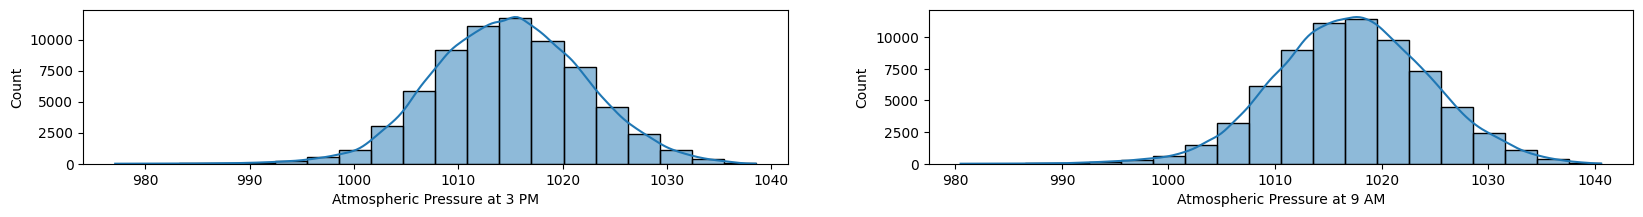

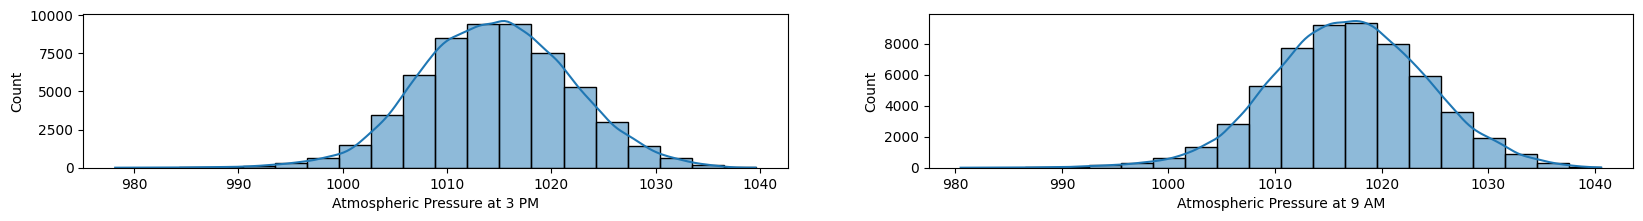

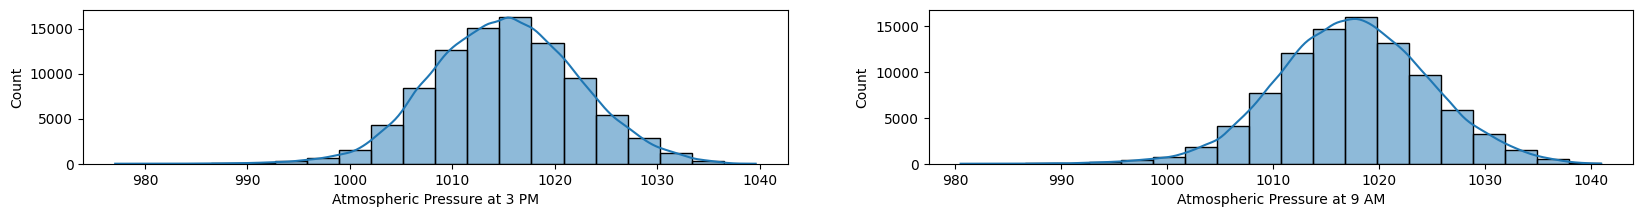

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train1["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train1["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train2["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train2["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train3["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train3["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
df_train1[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum()

Atmospheric Pressure at 9 AM    7441
Atmospheric Pressure at 3 PM    7444
dtype: int64

In [ ]:
# Atmospheric Pressure at 3pm(sample 1)
atmospheric_pressure_filler_3pm_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 3 PM'].median()
atmospheric_pressure_filler_3pm_sample1 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample1.fillna(method='ffill'),columns=["Atmospheric Pressure at 3 PM"])
atmospheric_pressure_filler_3pm_sample1 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample1.fillna(method='bfill'),columns=["Atmospheric Pressure at 3 PM"])
df_train1.update(atmospheric_pressure_filler_3pm_sample1,overwrite=False)
# Atmospheric Pressure at 9am(sample 1)
atmospheric_pressure_filler_9am_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 9 AM'].median()
atmospheric_pressure_filler_9am_sample1 = pd.DataFrame(atmospheric_pressure_filler_9am_sample1.fillna(method='ffill'),columns=["Atmospheric Pressure at 9 AM"])
atmospheric_pressure_filler_9am_sample1 = pd.DataFrame(atmospheric_pressure_filler_9am_sample1.fillna(method='bfill'),columns=["Atmospheric Pressure at 9 AM"])
df_train1.update(atmospheric_pressure_filler_9am_sample1,overwrite=False)

# Atmospheric Pressure at 3pm(sample 2)
atmospheric_pressure_filler_3pm_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 3 PM'].median()
atmospheric_pressure_filler_3pm_sample2 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample2.fillna(method='ffill'),columns=["Atmospheric Pressure at 3 PM"])
atmospheric_pressure_filler_3pm_sample2 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample2.fillna(method='bfill'),columns=["Atmospheric Pressure at 3 PM"])
df_train2.update(atmospheric_pressure_filler_3pm_sample2,overwrite=False)
# Atmospheric Pressure at 9am(sample 2)
atmospheric_pressure_filler_9am_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 9 AM'].median()
atmospheric_pressure_filler_9am_sample2 = pd.DataFrame(atmospheric_pressure_filler_9am_sample2.fillna(method='ffill'),columns=["Atmospheric Pressure at 9 AM"])
atmospheric_pressure_filler_9am_sample2 = pd.DataFrame(atmospheric_pressure_filler_9am_sample2.fillna(method='bfill'),columns=["Atmospheric Pressure at 9 AM"])
df_train2.update(atmospheric_pressure_filler_9am_sample2,overwrite=False)


# Atmospheric Pressure at 3pm(sample 3)
atmospheric_pressure_filler_3pm_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 3 PM'].median()
atmospheric_pressure_filler_3pm_sample3 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample3.fillna(method='ffill'),columns=["Atmospheric Pressure at 3 PM"])
atmospheric_pressure_filler_3pm_sample3 = pd.DataFrame(atmospheric_pressure_filler_3pm_sample3.fillna(method='bfill'),columns=["Atmospheric Pressure at 3 PM"])
df_train3.update(atmospheric_pressure_filler_3pm_sample3,overwrite=False)
# Atmospheric Pressure at 9am(sample 3)
atmospheric_pressure_filler_9am_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Atmospheric Pressure at 9 AM'].median()
atmospheric_pressure_filler_9am_sample3 = pd.DataFrame(atmospheric_pressure_filler_9am_sample3.fillna(method='ffill'),columns=["Atmospheric Pressure at 9 AM"])
atmospheric_pressure_filler_9am_sample3 = pd.DataFrame(atmospheric_pressure_filler_9am_sample3.fillna(method='bfill'),columns=["Atmospheric Pressure at 9 AM"])
df_train3.update(atmospheric_pressure_filler_9am_sample3,overwrite=False)
#atm_pres_9am_imputer = KNNImputer(n_neighbors=3)
#atm_pres_3pm_imputer = KNNImputer(n_neighbors=3)
#df_train["Atmospheric Pressure at 9 AM"]= atm_pres_9am_imputer.fit_transform(df_train[["Atmospheric Pressure at 9 AM"]])
#df_train["Atmospheric Pressure at 3 PM"]= atm_pres_3pm_imputer.fit_transform(df_train[["Atmospheric Pressure at 3 PM"]])




<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

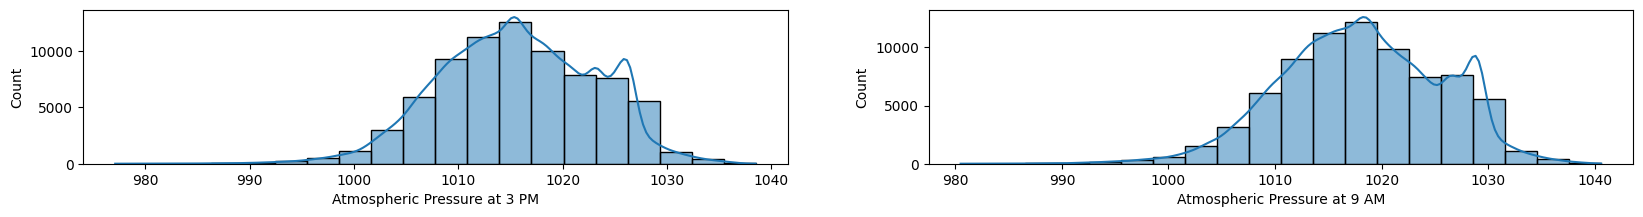

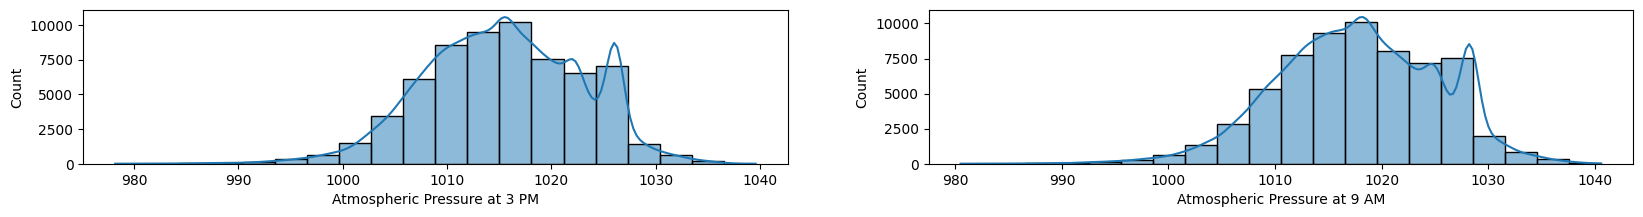

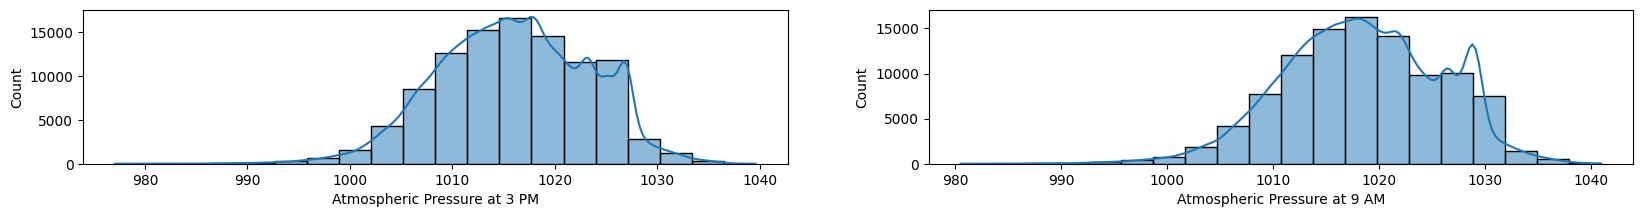

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train1["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train1["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train2["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train2["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train3["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train3["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
print(df_train1[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())
print(df_train2[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())
print(df_train3[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())

Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64


In [ ]:
# for sample 1
gust_trajectory_filler_sample1 = df_train1['Gust Trajectory'].fillna(df_train1['Gust Trajectory'].mode()[0])
gust_trajectory_filler_sample1 = pd.DataFrame(gust_trajectory_filler_sample1.fillna(method='ffill'),columns=["Gust Trajectory"])
gust_trajectory_filler_sample1 = pd.DataFrame(gust_trajectory_filler_sample1.fillna(method='bfill'),columns=["Gust Trajectory"])
df_train1.update(gust_trajectory_filler_sample1,overwrite=False)
gust_trajectory_at_3pm_filler_sample1 = df_train1['Gust Trajectory at  3 PM'].fillna(df_train1['Gust Trajectory at  3 PM'].mode()[0])
gust_trajectory_at_3pm_filler_sample1 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample1.fillna(method='ffill'),columns=["Gust Trajectory at  3 PM"])
gust_trajectory_at_3pm_filler_sample1 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample1.fillna(method='bfill'),columns=["Gust Trajectory at  3 PM"])
df_train1.update(gust_trajectory_at_3pm_filler_sample1,overwrite=False)
gust_trajectory_at_9am_filler_sample1 = df_train1['Gust Trajectory at  9 AM'].fillna(df_train1['Gust Trajectory at  9 AM'].mode()[0])
gust_trajectory_at_9am_filler_sample1 = pd.DataFrame(gust_trajectory_at_9am_filler_sample1.fillna(method='ffill'),columns=["Gust Trajectory at  9 AM"])
gust_trajectory_at_9am_filler_sample1 = pd.DataFrame(gust_trajectory_at_9am_filler_sample1.fillna(method='bfill'),columns=["Gust Trajectory at  9 AM"])
df_train1.update(gust_trajectory_at_9am_filler_sample1,overwrite=False)



# for sample 2
gust_trajectory_filler_sample2 = df_train2['Gust Trajectory'].fillna(df_train2['Gust Trajectory'].mode()[0])
gust_trajectory_filler_sample2 = pd.DataFrame(gust_trajectory_filler_sample2.fillna(method='ffill'),columns=["Gust Trajectory"])
gust_trajectory_filler_sample2 = pd.DataFrame(gust_trajectory_filler_sample2.fillna(method='bfill'),columns=["Gust Trajectory"])
df_train2.update(gust_trajectory_filler_sample2,overwrite=False)
gust_trajectory_at_3pm_filler_sample2 = df_train2['Gust Trajectory at  3 PM'].fillna(df_train2['Gust Trajectory at  3 PM'].mode()[0])
gust_trajectory_at_3pm_filler_sample2 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample2.fillna(method='ffill'),columns=["Gust Trajectory at  3 PM"])
gust_trajectory_at_3pm_filler_sample2 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample2.fillna(method='bfill'),columns=["Gust Trajectory at  3 PM"])
df_train2.update(gust_trajectory_at_3pm_filler_sample2,overwrite=False)
gust_trajectory_at_9am_filler_sample2 = df_train2['Gust Trajectory at  9 AM'].fillna(df_train2['Gust Trajectory at  9 AM'].mode()[0])
gust_trajectory_at_9am_filler_sample2 = pd.DataFrame(gust_trajectory_at_9am_filler_sample2.fillna(method='ffill'),columns=["Gust Trajectory at  9 AM"])
gust_trajectory_at_9am_filler_sample2 = pd.DataFrame(gust_trajectory_at_9am_filler_sample2.fillna(method='bfill'),columns=["Gust Trajectory at  9 AM"])
df_train2.update(gust_trajectory_at_9am_filler_sample2,overwrite=False)



# for sample 1
gust_trajectory_filler_sample3 = df_train3['Gust Trajectory'].fillna(df_train3['Gust Trajectory'].mode()[0])
gust_trajectory_filler_sample3 = pd.DataFrame(gust_trajectory_filler_sample3.fillna(method='ffill'),columns=["Gust Trajectory"])
gust_trajectory_filler_sample3 = pd.DataFrame(gust_trajectory_filler_sample3.fillna(method='bfill'),columns=["Gust Trajectory"])
df_train3.update(gust_trajectory_filler_sample3,overwrite=False)
gust_trajectory_at_3pm_filler_sample3 = df_train3['Gust Trajectory at  3 PM'].fillna(df_train3['Gust Trajectory at  3 PM'].mode()[0])
gust_trajectory_at_3pm_filler_sample3 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample3.fillna(method='ffill'),columns=["Gust Trajectory at  3 PM"])
gust_trajectory_at_3pm_filler_sample3 = pd.DataFrame(gust_trajectory_at_3pm_filler_sample3.fillna(method='bfill'),columns=["Gust Trajectory at  3 PM"])
df_train3.update(gust_trajectory_at_3pm_filler_sample3,overwrite=False)
gust_trajectory_at_9am_filler_sample3 = df_train3['Gust Trajectory at  9 AM'].fillna(df_train3['Gust Trajectory at  9 AM'].mode()[0])
gust_trajectory_at_9am_filler_sample3 = pd.DataFrame(gust_trajectory_at_9am_filler_sample3.fillna(method='ffill'),columns=["Gust Trajectory at  9 AM"])
gust_trajectory_at_9am_filler_sample3 = pd.DataFrame(gust_trajectory_at_9am_filler_sample3.fillna(method='bfill'),columns=["Gust Trajectory at  9 AM"])
df_train3.update(gust_trajectory_at_9am_filler_sample3,overwrite=False)



In [ ]:
print(df_train1[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())
print(df_train2[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())
print(df_train3[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())


Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64
Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64
Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64


<Axes: xlabel='Evaporation', ylabel='Count'>

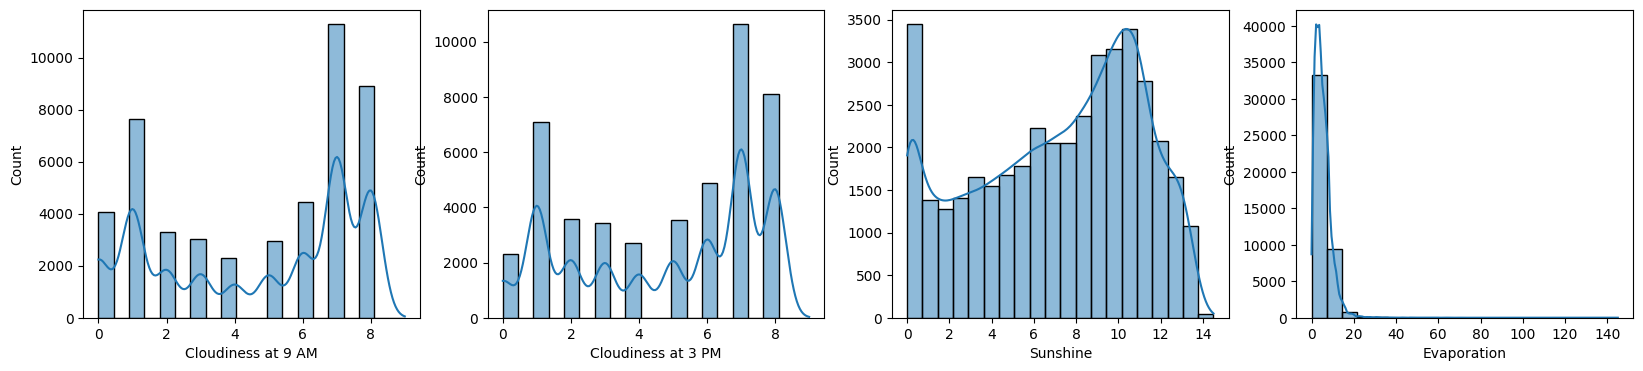

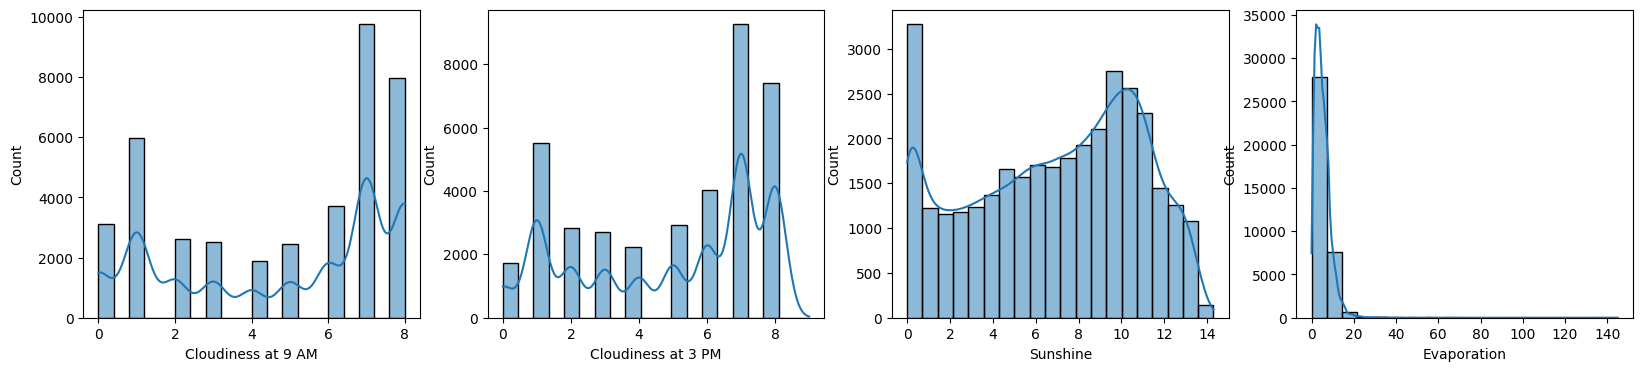

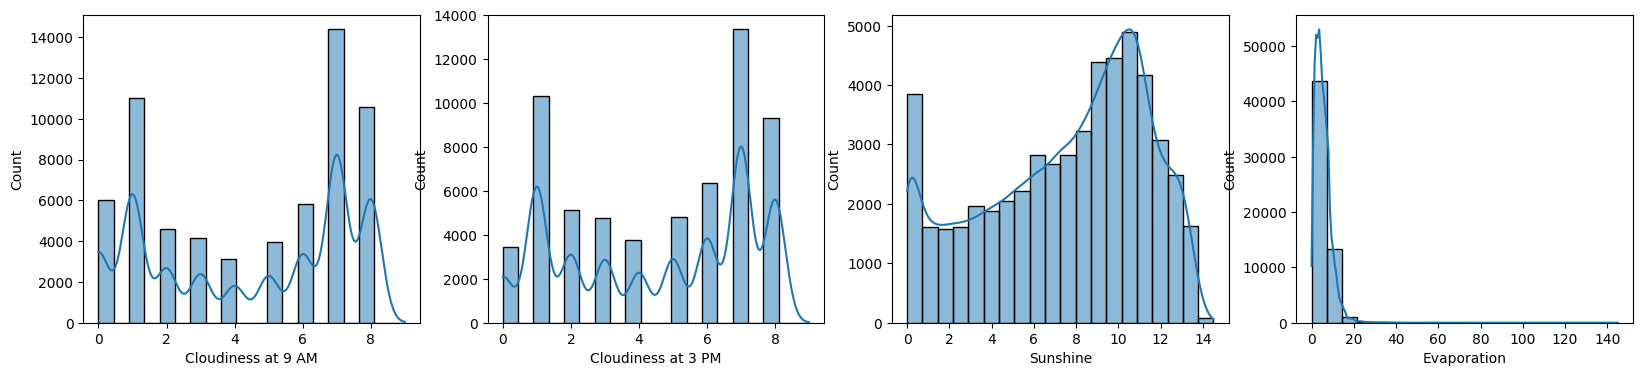

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train1["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train1["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train1["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train1["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train2["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train2["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train2["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train2["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train3["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train3["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train3["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train3["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
# for sample 1
cloudiness_at_9_am_median_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Cloudiness at 9 AM'].median()
cloudiness_at_9_am_median_sample1 = pd.DataFrame(cloudiness_at_9_am_median_sample1.fillna(method='ffill'),columns=["Cloudiness at 9 AM"])
cloudiness_at_9_am_median_sample1 = pd.DataFrame(cloudiness_at_9_am_median_sample1.fillna(method='bfill'),columns=["Cloudiness at 9 AM"])
df_train1.update(cloudiness_at_9_am_median_sample1,overwrite=False)

cloudiness_at_3_pm_median_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Cloudiness at 3 PM'].median()
cloudiness_at_3_pm_median_sample1 = pd.DataFrame(cloudiness_at_3_pm_median_sample1.fillna(method='ffill'),columns=["Cloudiness at 3 PM"])
cloudiness_at_3_pm_median_sample1 = pd.DataFrame(cloudiness_at_3_pm_median_sample1.fillna(method='bfill'),columns=["Cloudiness at 3 PM"])
df_train1.update(cloudiness_at_3_pm_median_sample1,overwrite=False)

sunshine_mean_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Sunshine'].mean()
sunshine_mean_sample1 = pd.DataFrame(sunshine_mean_sample1.fillna(method='ffill'),columns=["Sunshine"])
sunshine_mean_sample1 = pd.DataFrame(sunshine_mean_sample1.fillna(method='bfill'),columns=["Sunshine"])
df_train1.update(sunshine_mean_sample1,overwrite=False)

evaporation_mean_sample1 = df_train1.groupby(['Weather Station','Year','Month'])['Evaporation'].median()
evaporation_mean_sample1 = pd.DataFrame(evaporation_mean_sample1.fillna(method='ffill'),columns=["Evaporation"])
evaporation_mean_sample1 = pd.DataFrame(evaporation_mean_sample1.fillna(method='bfill'),columns=["Evaporation"])
df_train1.update(evaporation_mean_sample1,overwrite=False)


# for sample 2
cloudiness_at_9_am_median_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Cloudiness at 9 AM'].median()
cloudiness_at_9_am_median_sample2 = pd.DataFrame(cloudiness_at_9_am_median_sample2.fillna(method='ffill'),columns=["Cloudiness at 9 AM"])
cloudiness_at_9_am_median_sample2 = pd.DataFrame(cloudiness_at_9_am_median_sample2.fillna(method='bfill'),columns=["Cloudiness at 9 AM"])
df_train2.update(cloudiness_at_9_am_median_sample2,overwrite=False)

cloudiness_at_3_pm_median_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Cloudiness at 3 PM'].median()
cloudiness_at_3_pm_median_sample2 = pd.DataFrame(cloudiness_at_3_pm_median_sample2.fillna(method='ffill'),columns=["Cloudiness at 3 PM"])
cloudiness_at_3_pm_median_sample2 = pd.DataFrame(cloudiness_at_3_pm_median_sample2.fillna(method='bfill'),columns=["Cloudiness at 3 PM"])
df_train2.update(cloudiness_at_3_pm_median_sample2,overwrite=False)

sunshine_mean_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Sunshine'].mean()
sunshine_mean_sample2 = pd.DataFrame(sunshine_mean_sample2.fillna(method='ffill'),columns=["Sunshine"])
sunshine_mean_sample2 = pd.DataFrame(sunshine_mean_sample2.fillna(method='bfill'),columns=["Sunshine"])
df_train2.update(sunshine_mean_sample2,overwrite=False)

evaporation_mean_sample2 = df_train2.groupby(['Weather Station','Year','Month'])['Evaporation'].median()
evaporation_mean_sample2 = pd.DataFrame(evaporation_mean_sample2.fillna(method='ffill'),columns=["Evaporation"])
evaporation_mean_sample2 = pd.DataFrame(evaporation_mean_sample2.fillna(method='bfill'),columns=["Evaporation"])
df_train2.update(evaporation_mean_sample2,overwrite=False)


# for sample 3
cloudiness_at_9_am_median_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Cloudiness at 9 AM'].median()
cloudiness_at_9_am_median_sample3 = pd.DataFrame(cloudiness_at_9_am_median_sample3.fillna(method='ffill'),columns=["Cloudiness at 9 AM"])
cloudiness_at_9_am_median_sample3 = pd.DataFrame(cloudiness_at_9_am_median_sample3.fillna(method='bfill'),columns=["Cloudiness at 9 AM"])
df_train3.update(cloudiness_at_9_am_median_sample3,overwrite=False)

cloudiness_at_3_pm_median_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Cloudiness at 3 PM'].median()
cloudiness_at_3_pm_median_sample3 = pd.DataFrame(cloudiness_at_3_pm_median_sample3.fillna(method='ffill'),columns=["Cloudiness at 3 PM"])
cloudiness_at_3_pm_median_sample3 = pd.DataFrame(cloudiness_at_3_pm_median_sample3.fillna(method='bfill'),columns=["Cloudiness at 3 PM"])
df_train3.update(cloudiness_at_3_pm_median_sample3,overwrite=False)

sunshine_mean_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Sunshine'].mean()
sunshine_mean_sample3 = pd.DataFrame(sunshine_mean_sample3.fillna(method='ffill'),columns=["Sunshine"])
sunshine_mean_sample3 = pd.DataFrame(sunshine_mean_sample3.fillna(method='bfill'),columns=["Sunshine"])
df_train3.update(sunshine_mean_sample3,overwrite=False)

evaporation_mean_sample3 = df_train3.groupby(['Weather Station','Year','Month'])['Evaporation'].median()
evaporation_mean_sample3 = pd.DataFrame(evaporation_mean_sample3.fillna(method='ffill'),columns=["Evaporation"])
evaporation_mean_sample3 = pd.DataFrame(evaporation_mean_sample3.fillna(method='bfill'),columns=["Evaporation"])
df_train3.update(evaporation_mean_sample3,overwrite=False)


#cloudiness_at_9_am_imputer = KNNImputer(n_neighbors=1)
#df_train["Cloudiness at 9 AM"] = cloudiness_at_9_am_imputer.fit_transform(df_train[["Cloudiness at 9 AM"]])
#cloudiness_at_3_pm_imputer = KNNImputer(n_neighbors=1)
#df_train["Cloudiness at 3 PM"] = cloudiness_at_3_pm_imputer.fit_transform(df_train[["Cloudiness at 3 PM"]])
#sunshine_imputer = KNNImputer(n_neighbors=1)
#df_train["Sunshine"] = sunshine_imputer.fit_transform(df_train[["Sunshine"]])
#evaporation_imputer = KNNImputer(n_neighbors=1)
#df_train["Evaporation"] = evaporation_imputer.fit_transform(df_train[["Evaporation"]])

<Axes: xlabel='Evaporation', ylabel='Count'>

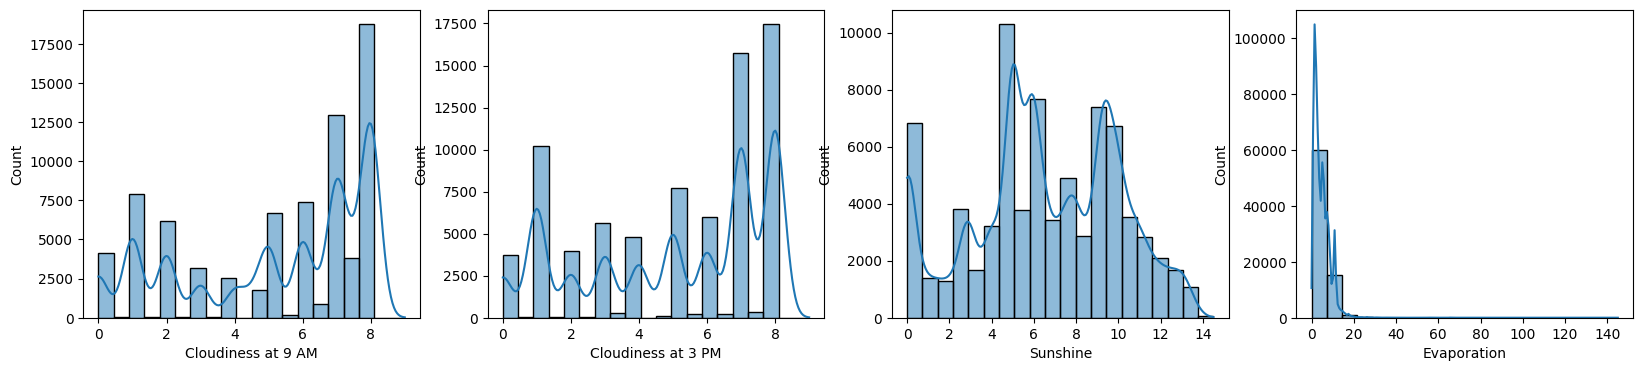

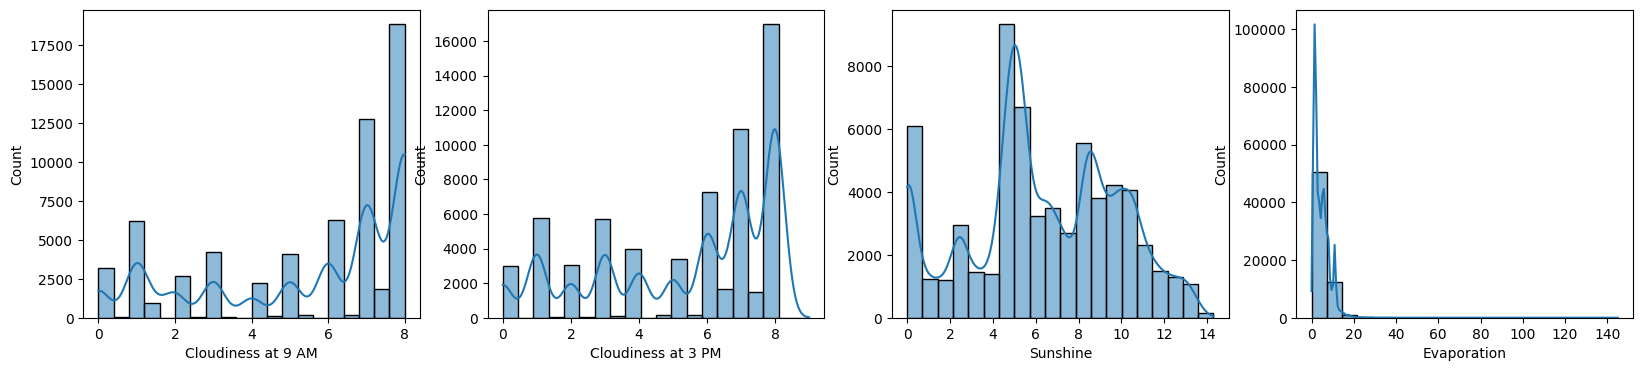

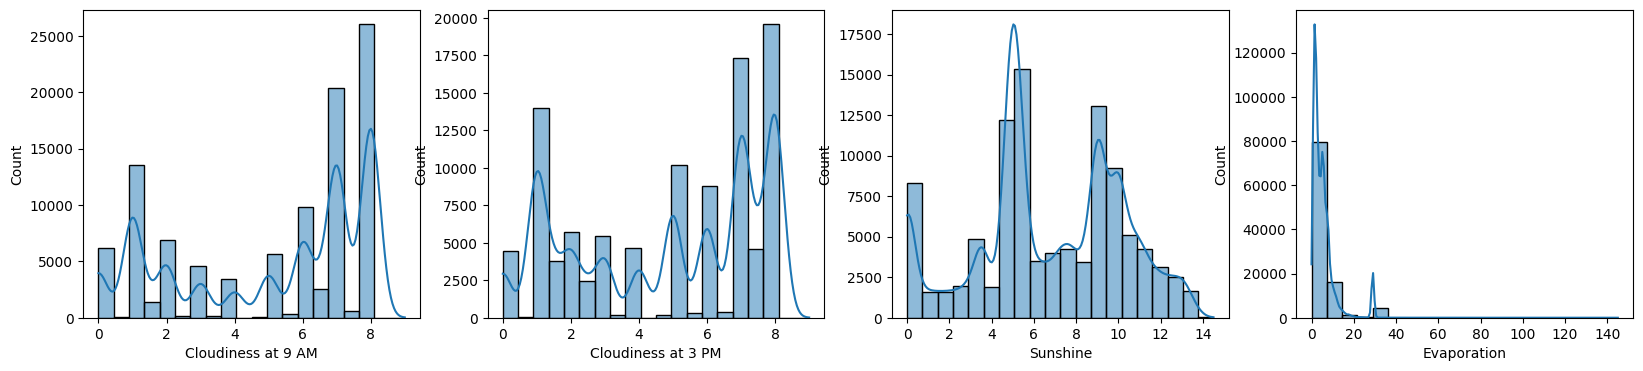

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train1["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train1["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train1["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train1["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train2["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train2["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train2["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train2["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train3["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train3["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train3["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train3["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
print(df_train1[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())
print(df_train2[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())
print(df_train3[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())

Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64
Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64
Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64


In [ ]:
print(df_train1.isnull().sum().sum())
print(df_train2.isnull().sum().sum())
print(df_train3.isnull().sum().sum())

0
0
0


In [ ]:
df_train1.info()
print("----------------------------------------------------------")
df_train2.info()
print("----------------------------------------------------------")
df_train3.info()
print("----------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 76504 entries, ('Station 1', 2014, 2) to ('Station 17', 2017, 6)
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Minimum Temperature           76504 non-null  float64       
 1   Maximum Temperature           76504 non-null  float64       
 2   Rainfall                      76504 non-null  float64       
 3   Evaporation                   76504 non-null  float64       
 4   Sunshine                      76504 non-null  float64       
 5   Gust Trajectory               76504 non-null  object        
 6   Air Velocity                  76504 non-null  float64       
 7   Gust Trajectory at  9 AM      76504 non-null  object        
 8   Gust Trajectory at  3 PM      76504 non-null  object        
 9   Air Velocity at  9 AM         76504 non-null  float64       
 10  Air Velocity at  3 PM         76504 non-null  float64  

In [ ]:
df_train1 = df_train1.reset_index()
df_train2 = df_train2.reset_index()
df_train3 = df_train3.reset_index()

In [ ]:
null_proportions_df_train1 = df_train1.isnull().mean()
null_percentages_df_train1 = null_proportions_df_train1 * 100
print("Percentage of null values(df_train1) in each column : ")
for column, percentage in null_percentages_df_train1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train2 = df_train2.isnull().mean()
null_percentages_df_train2 = null_proportions_df_train2 * 100
print("Percentage of null values(df_train2) in each column : ")
for column, percentage in null_percentages_df_train2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_train3 = df_train3.isnull().mean()
null_percentages_df_train3 = null_proportions_df_train3 * 100
print("Percentage of null values(df_train3) in each column : ")
for column, percentage in null_percentages_df_train3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_train1) in each column : 
Weather Station: 0.00%
Year: 0.00%
Month: 0.00%
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 0.00%
Sunshine: 0.00%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 0.00%
Gust Trajectory at  3 PM: 0.00%
Air Velocity at  9 AM: 0.00%
Air Velocity at  3 PM: 0.00%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 0.00%
Atmospheric Pressure at 3 PM: 0.00%
Cloudiness at 9 AM: 0.00%
Cloudiness at 3 PM: 0.00%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_train2) in each column : 
Weather Station: 0.00%
Year: 0.00%
Month: 0.00%
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 0.00%
Sunshine: 0.00%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Tr

## Test Preprocess

In [ ]:
df_test1 = pd.concat([X_test1, Y_test1], axis=1)
df_test2 = pd.concat([X_test2, Y_test2], axis=1)
df_test3 = pd.concat([X_test3, Y_test3], axis=1)


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_test1) in each column : 
Weather Station: 0.00%
Minimum Temperature: 0.42%
Maximum Temperature: 0.22%
Rainfall: 1.14%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 6.65%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.91%
Air Velocity at  3 PM: 1.97%
Moisture Level at 9 AM: 1.31%
Moisture Level at 3 PM: 2.69%
Atmospheric Pressure at 9 AM: 9.95%
Atmospheric Pressure at 3 PM: 9.88%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.68%
Recorded Temperature at 3 PM: 2.07%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Month: 0.00%
Year: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Weather Station: 0.00%
Minimum Temperature: 0.40%
Maximum Temperature: 0.23%
Rainfall: 1.09%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 6.87%
Gust Trajectory at  9 AM: 6.

In [ ]:
df_test1 = df_test1.set_index(['Weather Station','Year','Month'])
df_test2 = df_test2.set_index(['Weather Station','Year','Month'])
df_test3 = df_test3.set_index(['Weather Station','Year','Month'])

In [ ]:
print(df_test1[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())
print(df_test2[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())
print(df_test3[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())

Minimum Temperature              80
Maximum Temperature              43
Recorded Temperature at 9 AM    130
Recorded Temperature at 3 PM    395
dtype: int64
Minimum Temperature              63
Maximum Temperature              36
Recorded Temperature at 9 AM    104
Recorded Temperature at 3 PM    307
dtype: int64
Minimum Temperature             107
Maximum Temperature              53
Recorded Temperature at 9 AM    161
Recorded Temperature at 3 PM    517
dtype: int64


<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

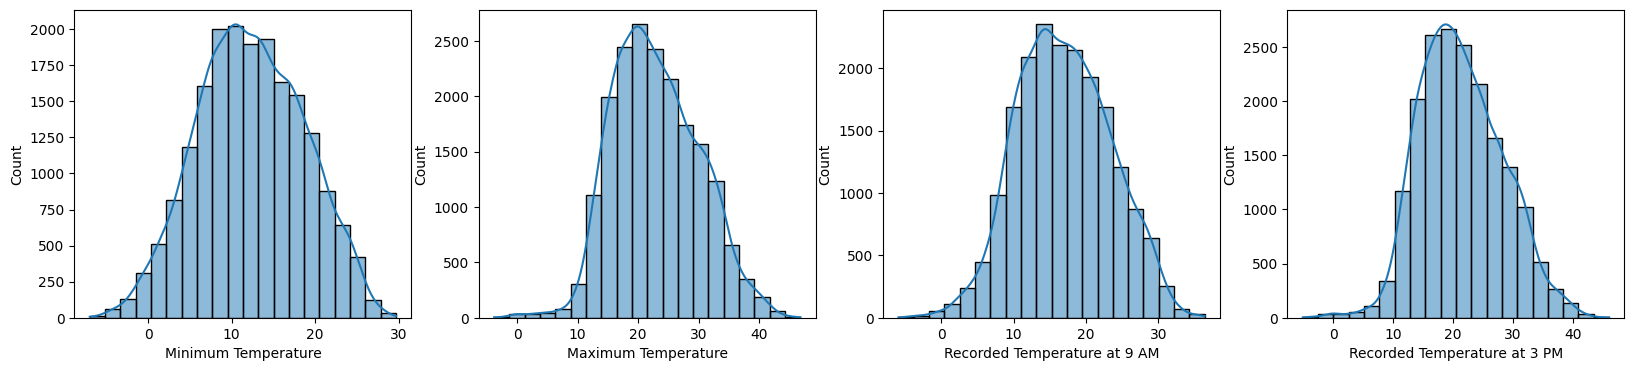

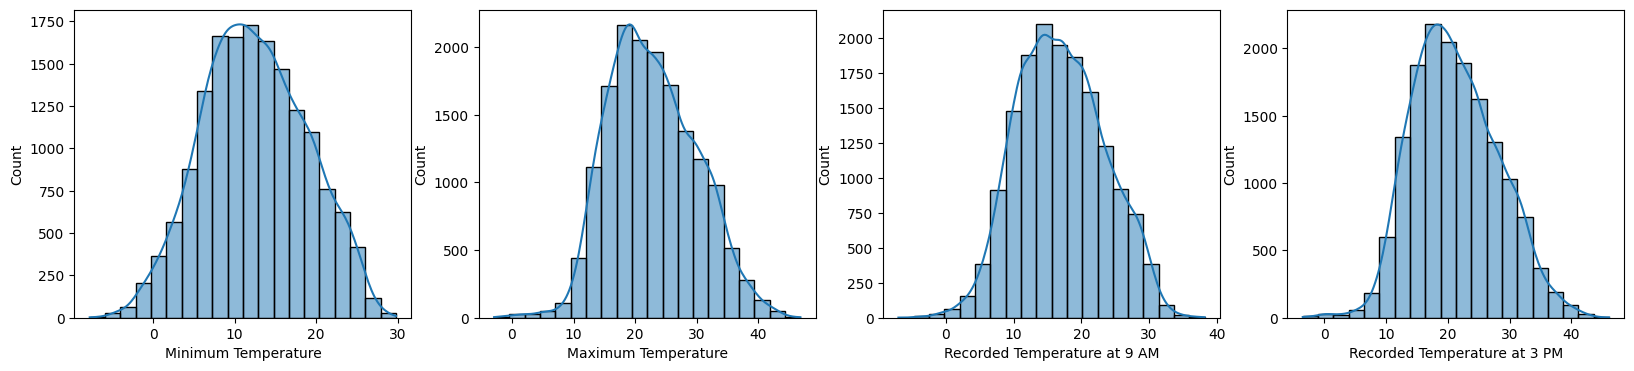

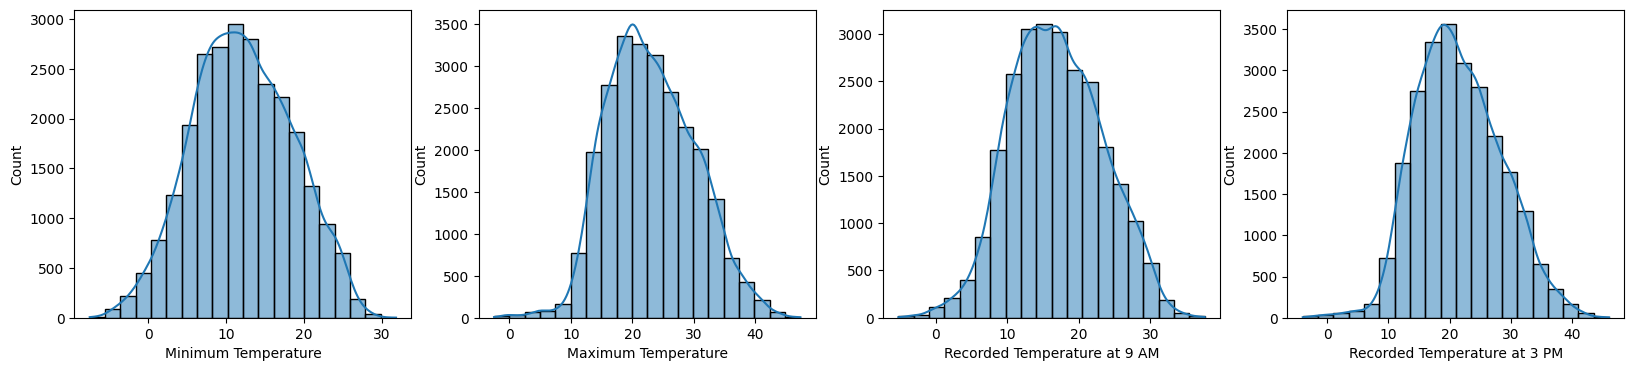

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test1["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test1["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test1["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test1["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test2["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test2["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test2["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test2["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test3["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test3["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test3["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test3["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

In [ ]:
df_test1.update(pd.DataFrame(min_temp_mean_sample1,columns=["Minimum Temperature"]),overwrite=False)
df_test1.update(pd.DataFrame(max_temp_mean_sample1,columns=["Maximum Temperature"]),overwrite=False)
df_test1.update(pd.DataFrame(recorded_temp_at_9_am_sample1,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_test1.update(pd.DataFrame(recorded_temp_at_3_pm_sample1,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

df_test2.update(pd.DataFrame(min_temp_mean_sample2,columns=["Minimum Temperature"]),overwrite=False)
df_test2.update(pd.DataFrame(max_temp_mean_sample2,columns=["Maximum Temperature"]),overwrite=False)
df_test2.update(pd.DataFrame(recorded_temp_at_9_am_sample2,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_test2.update(pd.DataFrame(recorded_temp_at_3_pm_sample2,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

df_test3.update(pd.DataFrame(min_temp_mean_sample3,columns=["Minimum Temperature"]),overwrite=False)
df_test3.update(pd.DataFrame(max_temp_mean_sample3,columns=["Maximum Temperature"]),overwrite=False)
df_test3.update(pd.DataFrame(recorded_temp_at_9_am_sample3,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_test3.update(pd.DataFrame(recorded_temp_at_3_pm_sample3,columns=["Recorded Temperature at 3 PM"]),overwrite=False)


columns_to_fill = [
    "Minimum Temperature",
    "Maximum Temperature",
    "Recorded Temperature at 9 AM",
    "Recorded Temperature at 3 PM"
]

def fill_columns(df , columns):
  df[columns] = df[columns].ffill()
  df[columns] = df[columns].bfill()

fill_columns(df_test1, columns_to_fill)
fill_columns(df_test2, columns_to_fill)
fill_columns(df_test3, columns_to_fill)

In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.14%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 6.65%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.91%
Air Velocity at  3 PM: 1.97%
Moisture Level at 9 AM: 1.31%
Moisture Level at 3 PM: 2.69%
Atmospheric Pressure at 9 AM: 9.95%
Atmospheric Pressure at 3 PM: 9.88%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.09%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 6.87%
Gust Trajectory at  9 AM: 6.89%
Gust Trajectory at  3 PM: 2.70%
Air Velocity at  9 AM: 0.92%
Air Ve

<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

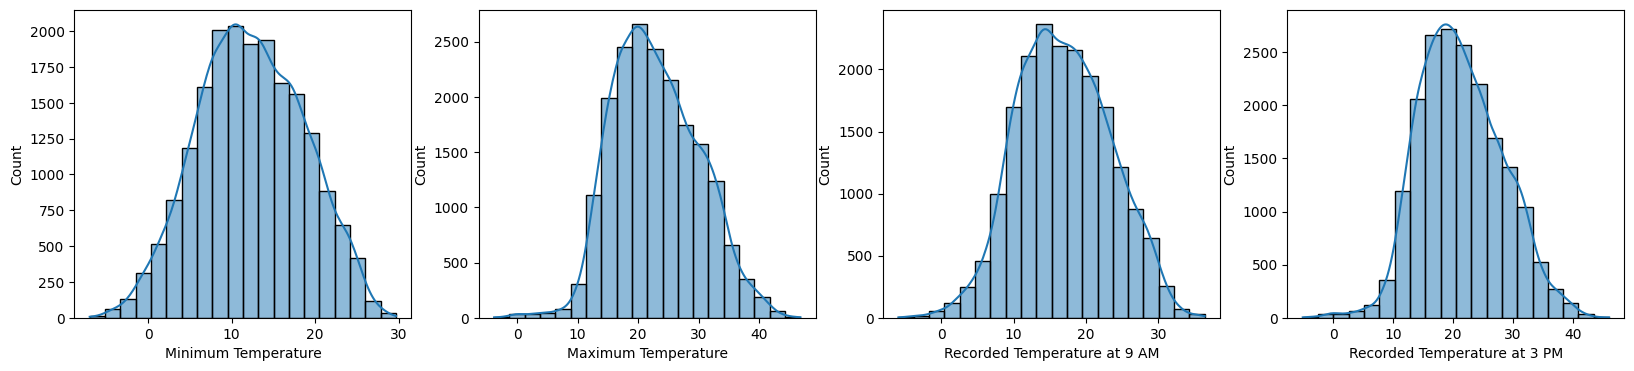

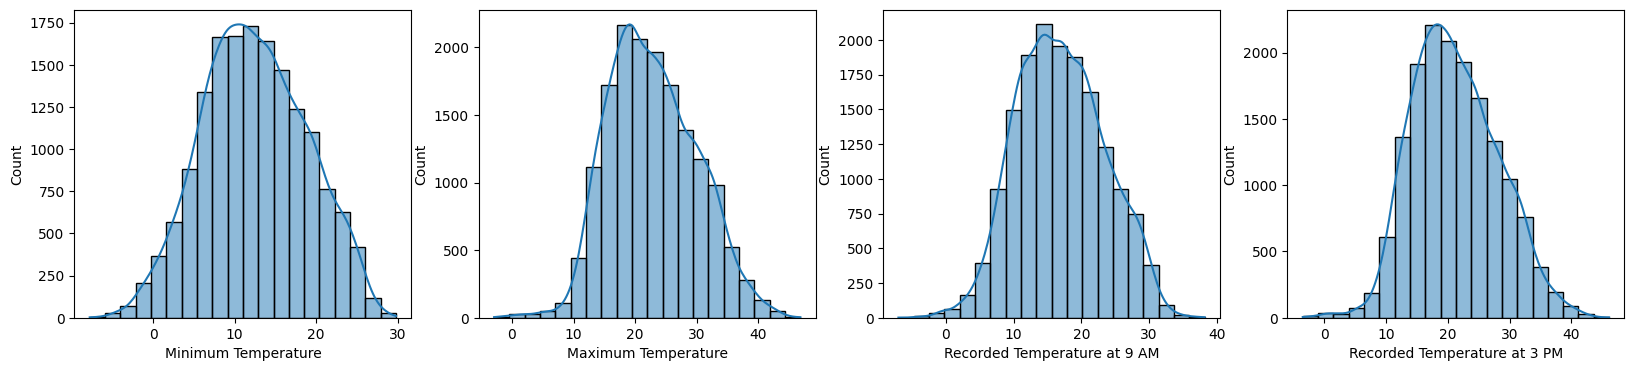

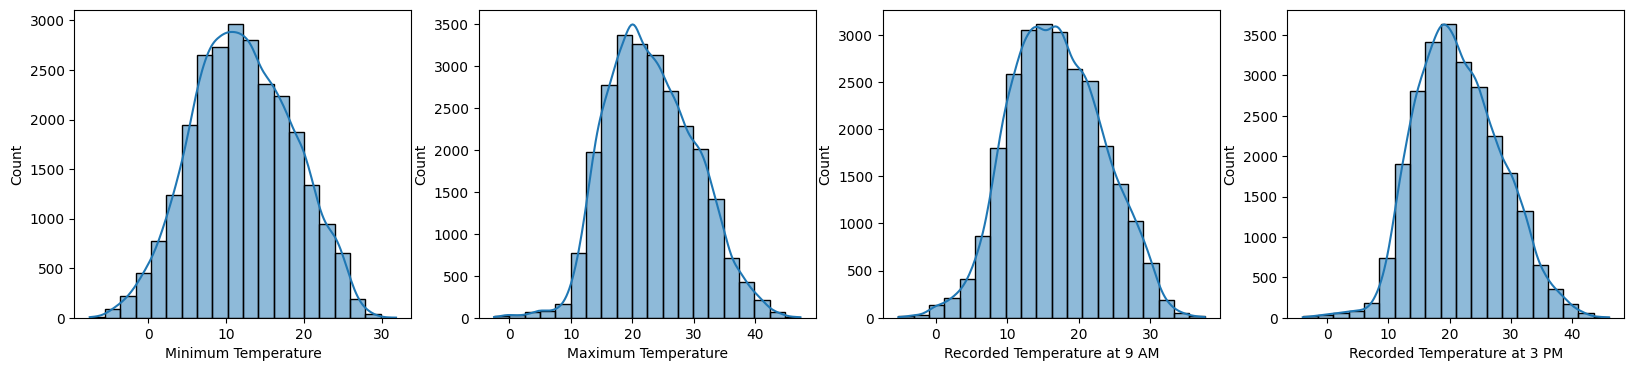

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test1["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test1["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test1["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test1["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test2["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test2["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test2["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test2["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test3["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test3["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test3["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test3["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

In [ ]:
print(df_test1[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())
print(df_test2[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())
print(df_test3[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum())

Minimum Temperature             0
Maximum Temperature             0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
dtype: int64
Minimum Temperature             0
Maximum Temperature             0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
dtype: int64
Minimum Temperature             0
Maximum Temperature             0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
dtype: int64


In [ ]:
print(df_test1[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_test2[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_test3[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())

Moisture Level at 9 AM    250
Moisture Level at 3 PM    514
dtype: int64
Moisture Level at 9 AM    209
Moisture Level at 3 PM    417
dtype: int64
Moisture Level at 9 AM    308
Moisture Level at 3 PM    679
dtype: int64


In [ ]:
# Moisture Level at 3pm
df_test1.update(pd.DataFrame(moisture_level_train_filler_9am_sample1,columns=["Moisture Level at 9 AM"]),overwrite=False)
# Moisture Level at 9am
df_test1.update(pd.DataFrame(moisture_level_train_filler_3pm_sample1,columns=["Moisture Level at 3 PM"]),overwrite=False)

# Moisture Level at 3pm
df_test2.update(pd.DataFrame(moisture_level_train_filler_9am_sample2,columns=["Moisture Level at 9 AM"]),overwrite=False)
# Moisture Level at 9am
df_test2.update(pd.DataFrame(moisture_level_train_filler_3pm_sample2,columns=["Moisture Level at 3 PM"]),overwrite=False)

# Moisture Level at 3pm
df_test3.update(pd.DataFrame(moisture_level_train_filler_9am_sample3,columns=["Moisture Level at 9 AM"]),overwrite=False)
# Moisture Level at 9am
df_test3.update(pd.DataFrame(moisture_level_train_filler_3pm_sample3,columns=["Moisture Level at 3 PM"]),overwrite=False)

In [ ]:
print(df_test1[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_test2[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())
print(df_test3[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum())

Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64
Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64
Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.14%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 6.65%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.91%
Air Velocity at  3 PM: 1.97%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 9.95%
Atmospheric Pressure at 3 PM: 9.88%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 1.09%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 6.87%
Gust Trajectory at  9 AM: 6.89%
Gust Trajectory at  3 PM: 2.70%
Air Velocity at  9 AM: 0.92%
Air Ve

Text(0.5, 1.0, 'df_test3')

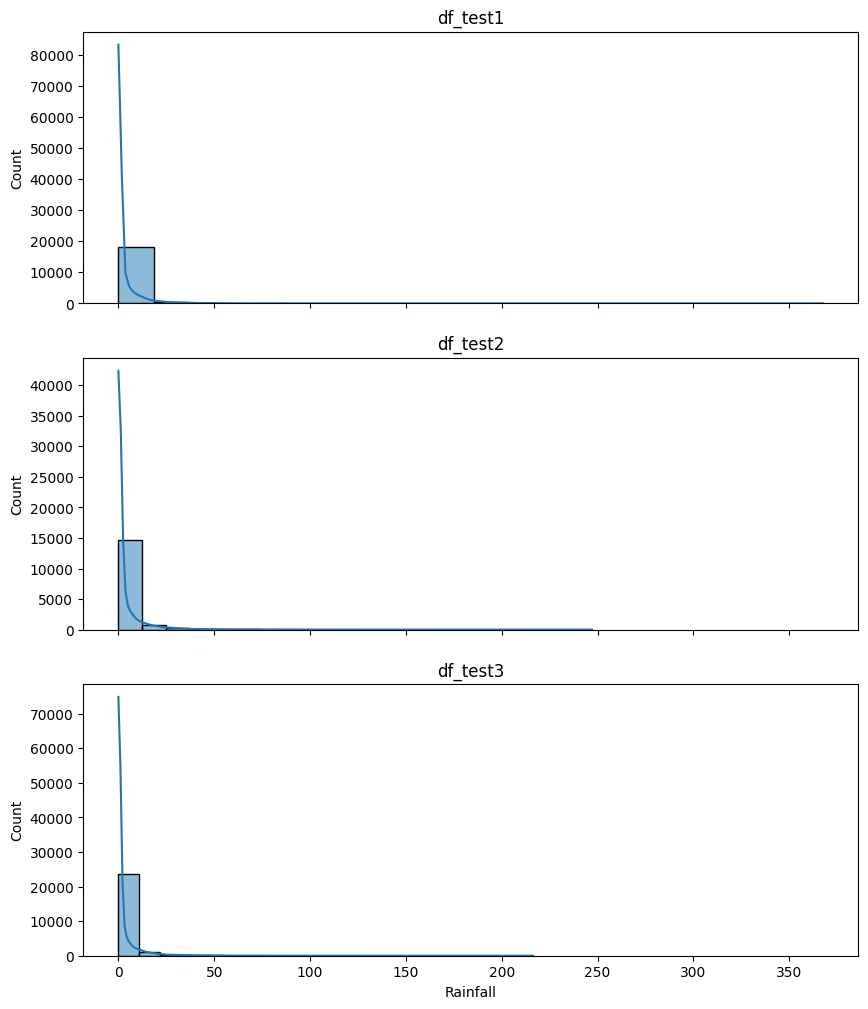

In [ ]:
f , axes = plt.subplots(3, 1, figsize = (10, 12), sharex = True)
sns.histplot(df_test1["Rainfall"], bins=20, kde=True, ax = axes[0])
axes[0].set_title("df_test1")
sns.histplot(df_test2["Rainfall"], bins=20, kde=True, ax = axes[1])
axes[1].set_title("df_test2")
sns.histplot(df_test3["Rainfall"], bins=20, kde=True, ax = axes[2])
axes[2].set_title("df_test3")

In [ ]:
df_test1["Rainfall"] = rainfall_imputer_df_train1.transform(df_test1[["Rainfall"]])
df_test2["Rainfall"] = rainfall_imputer_df_train2.transform(df_test2[["Rainfall"]])
df_test3["Rainfall"] = rainfall_imputer_df_train3.transform(df_test3[["Rainfall"]])

Text(0.5, 1.0, 'df_test3')

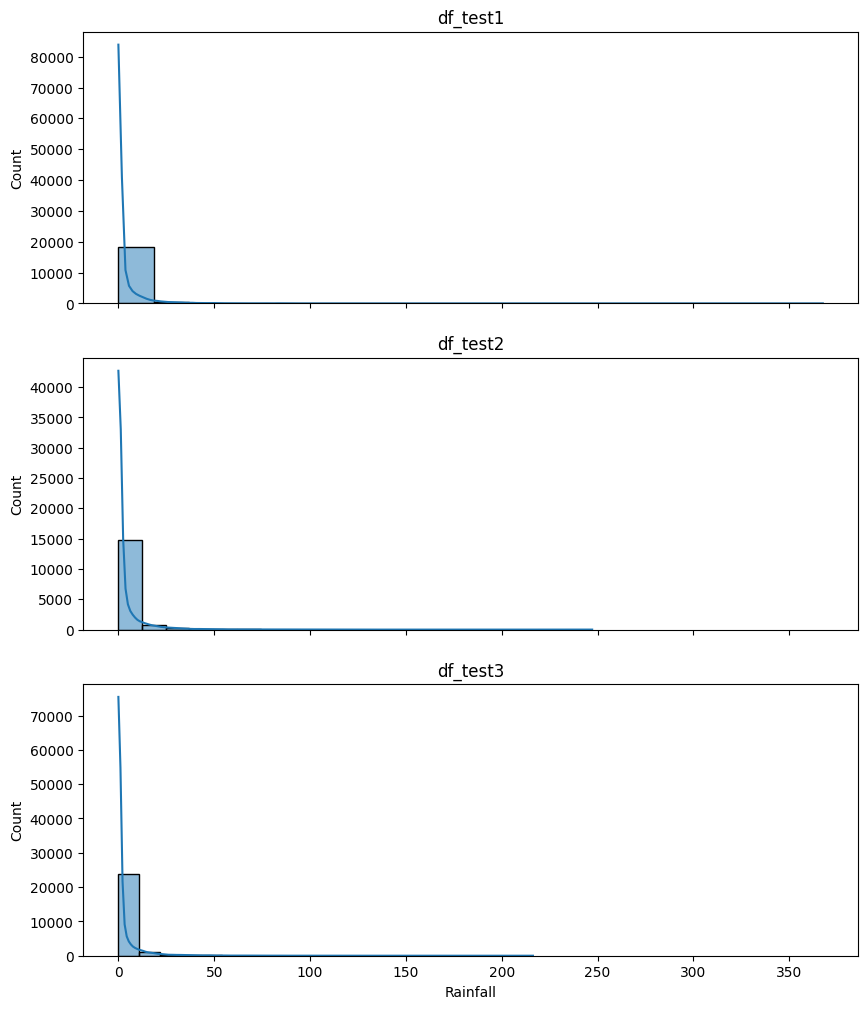

In [ ]:
f , axes = plt.subplots(3, 1, figsize = (10, 12), sharex = True)
sns.histplot(df_test1["Rainfall"], bins=20, kde=True, ax = axes[0])
axes[0].set_title("df_test1")
sns.histplot(df_test2["Rainfall"], bins=20, kde=True, ax = axes[1])
axes[1].set_title("df_test2")
sns.histplot(df_test3["Rainfall"], bins=20, kde=True, ax = axes[2])
axes[2].set_title("df_test3")

In [ ]:
print(df_test1["Rainfall"].isnull().sum())
print(df_test2["Rainfall"].isnull().sum())
print(df_test3["Rainfall"].isnull().sum())

0
0
0


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")

Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 6.65%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.91%
Air Velocity at  3 PM: 1.97%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 9.95%
Atmospheric Pressure at 3 PM: 9.88%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 6.87%
Gust Trajectory at  9 AM: 6.89%
Gust Trajectory at  3 PM: 2.70%
Air Velocity at  9 AM: 0.92%
Air Ve

<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

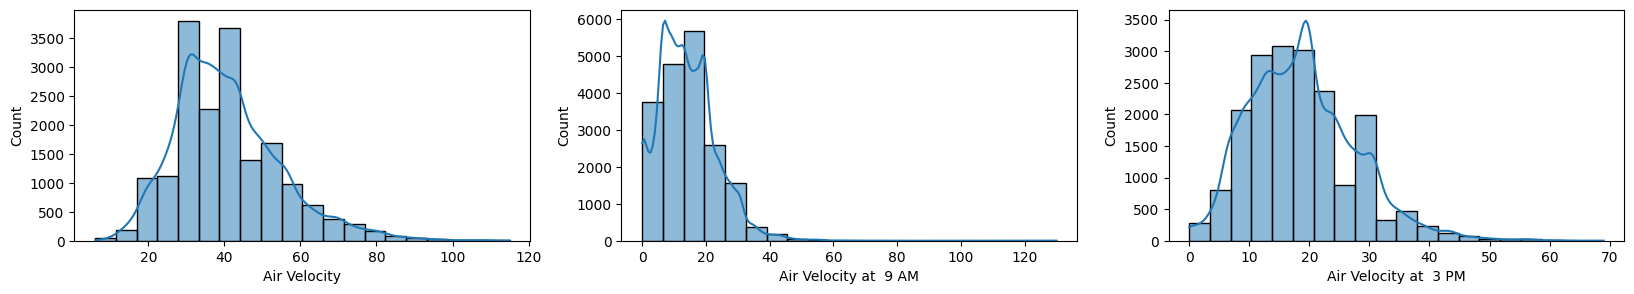

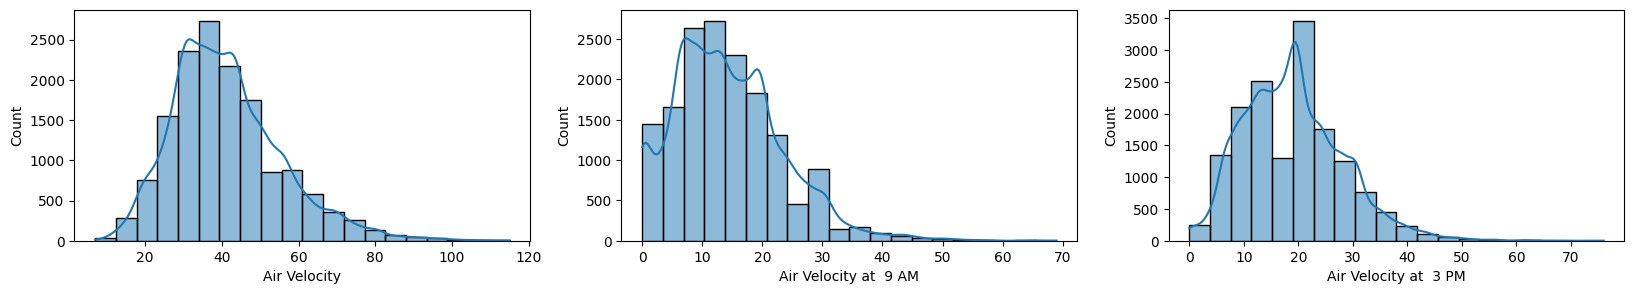

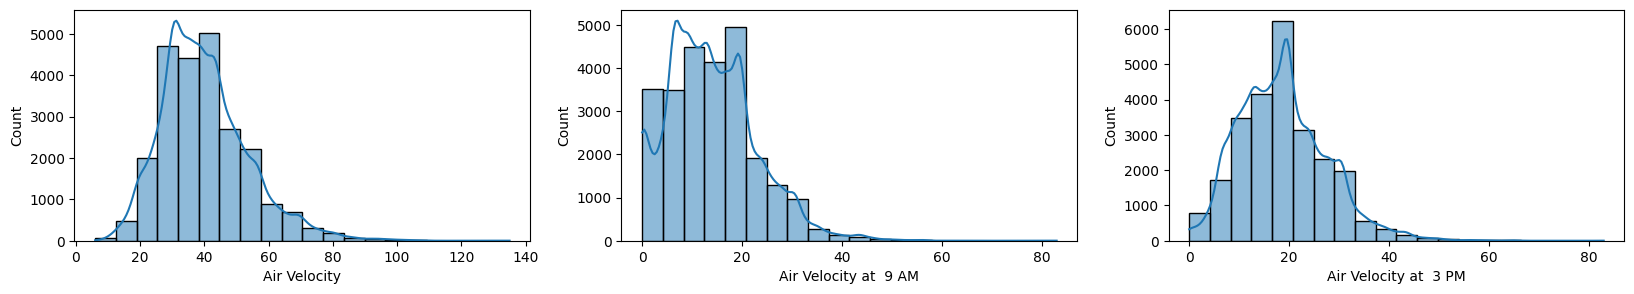

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test1["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test1["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test1["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test2["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test2["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test2["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test3["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test3["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test3["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

In [ ]:
# Air Velocity
df_test1.update(air_velocity_filler_sample1,overwrite=False)
# Air Velocity at 3pm
df_test1.update(air_velocity_filler_3pm_sample1,overwrite=False)
# Air Velocity at 9am
df_test1.update(air_velocity_filler_9am_sample1,overwrite=False)


# Air Velocity
df_test2.update(air_velocity_filler_sample2,overwrite=False)
# Air Velocity at 3pm
df_test2.update(air_velocity_filler_3pm_sample2,overwrite=False)
# Air Velocity at 9am
df_test2.update(air_velocity_filler_9am_sample2,overwrite=False)

# Air Velocity
df_test3.update(air_velocity_filler_sample3,overwrite=False)
# Air Velocity at 3pm
df_test3.update(air_velocity_filler_3pm_sample3,overwrite=False)
# Air Velocity at 9am
df_test3.update(air_velocity_filler_9am_sample3,overwrite=False)

<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

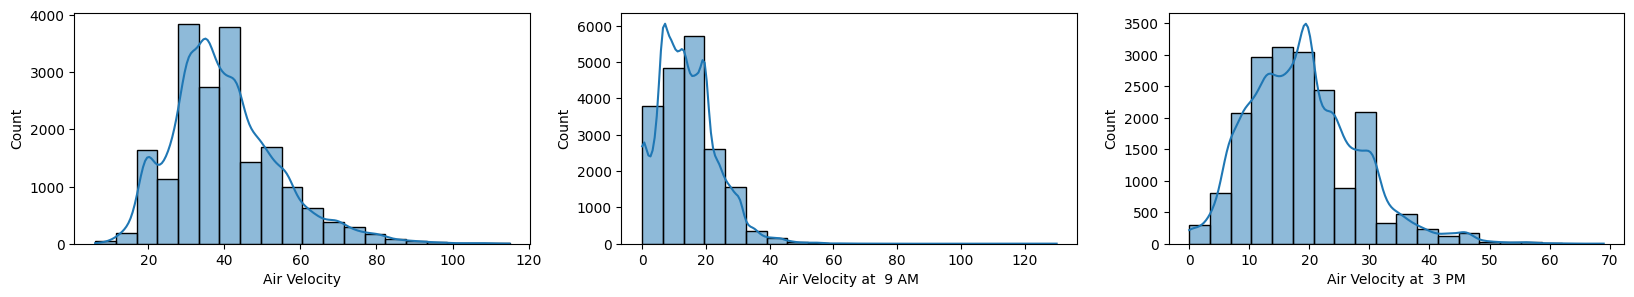

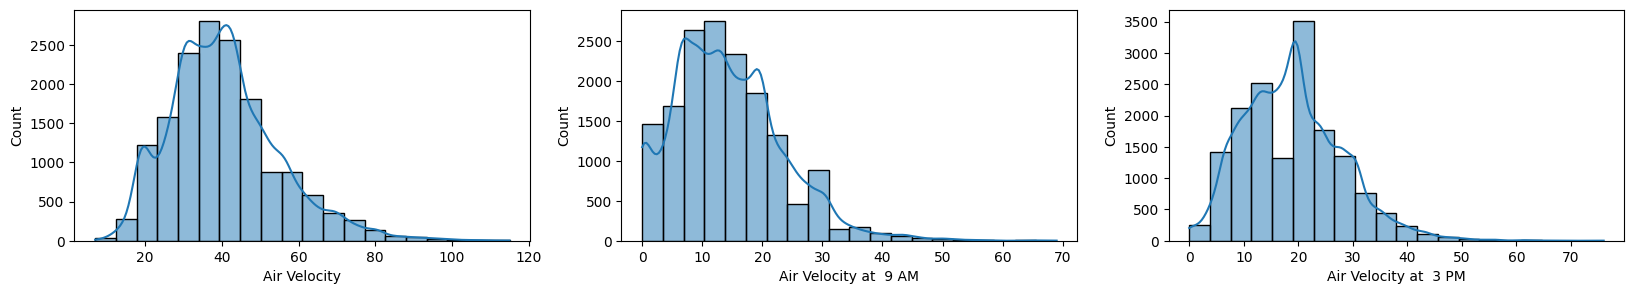

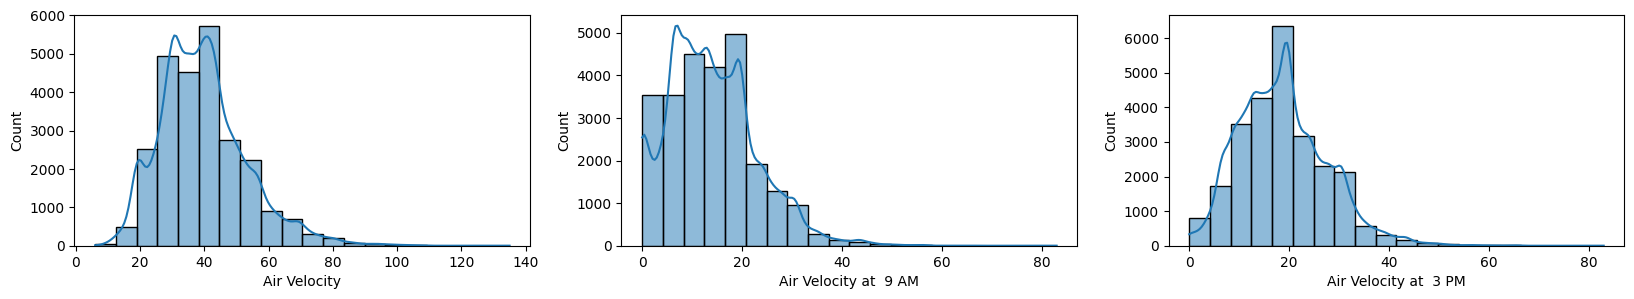

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test1["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test1["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test1["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test2["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test2["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test2["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test3["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test3["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test3["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

In [ ]:
print(df_test1[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())
print(df_test2[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())
print(df_test3[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum())

Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64
Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64
Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")


Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.00%
Air Velocity at  3 PM: 0.00%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 9.95%
Atmospheric Pressure at 3 PM: 9.88%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 6.89%
Gust Trajectory at  3 PM: 2.70%
Air Velocity at  9 AM: 0.00%
Air Ve

<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

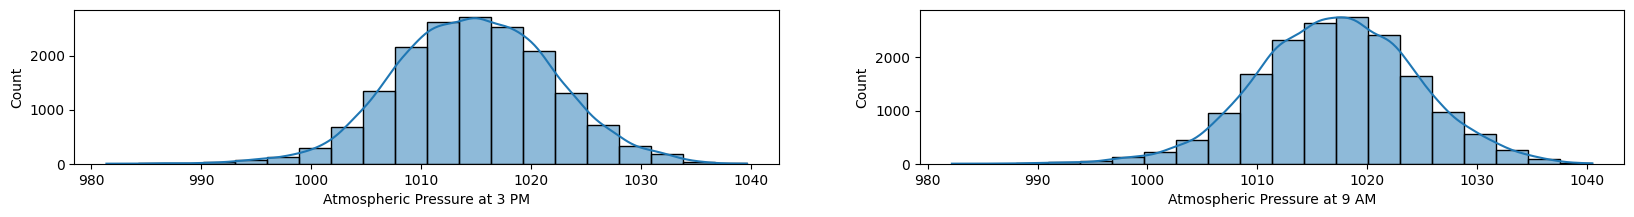

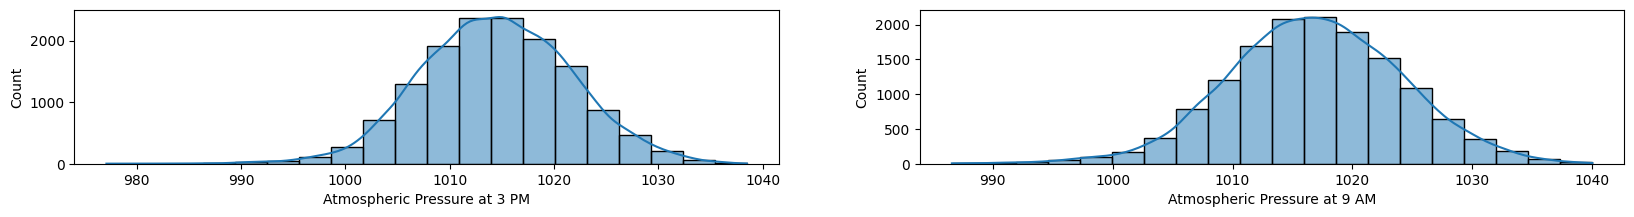

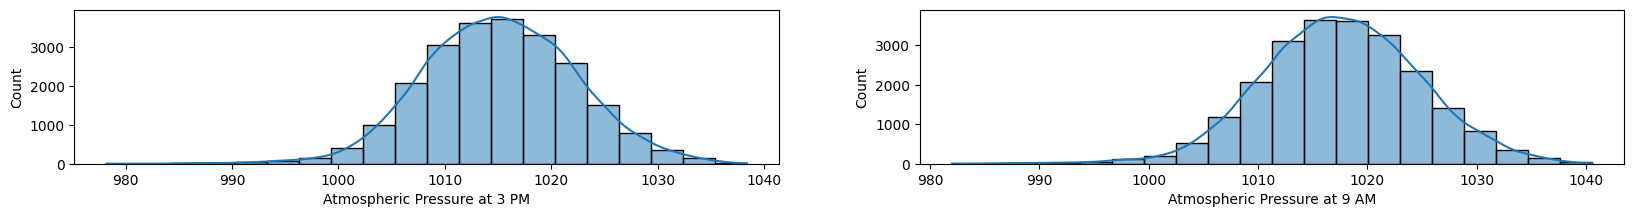

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test1["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test1["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test2["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test2["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test3["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test3["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
# Atmospheric Pressure at 3pm
df_test1.update(atmospheric_pressure_filler_3pm_sample1,overwrite=False)
# Atmospheric Pressure at 9am
df_test1.update(atmospheric_pressure_filler_9am_sample1,overwrite=False)


# Atmospheric Pressure at 3pm
df_test2.update(atmospheric_pressure_filler_3pm_sample2,overwrite=False)
# Atmospheric Pressure at 9am
df_test2.update(atmospheric_pressure_filler_9am_sample2,overwrite=False)

# Atmospheric Pressure at 3pm
df_test3.update(atmospheric_pressure_filler_3pm_sample3,overwrite=False)
# Atmospheric Pressure at 9am
df_test3.update(atmospheric_pressure_filler_9am_sample3,overwrite=False)

<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

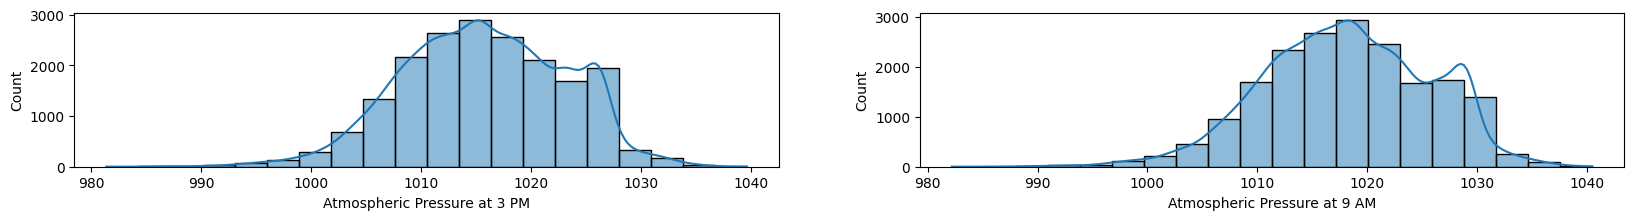

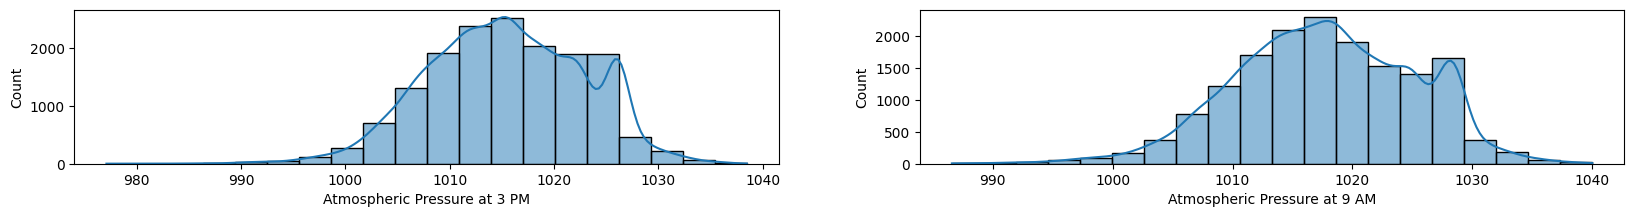

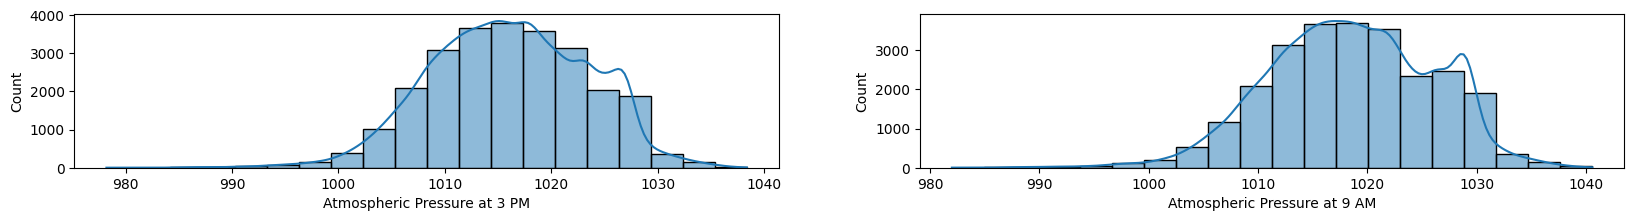

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test1["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test1["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test2["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test2["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test3["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test3["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
print(df_test1[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())
print(df_test2[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())
print(df_test3[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum())

Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")


Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 6.69%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 6.71%
Gust Trajectory at  3 PM: 2.82%
Air Velocity at  9 AM: 0.00%
Air Velocity at  3 PM: 0.00%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 0.00%
Atmospheric Pressure at 3 PM: 0.00%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 6.93%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 6.89%
Gust Trajectory at  3 PM: 2.70%
Air Velocity at  9 AM: 0.00%
Air Ve

In [ ]:
gust_trajectory_filler_df_test1 = df_test1['Gust Trajectory'].fillna(df_train1['Gust Trajectory'].mode()[0])
df_test1.update(gust_trajectory_filler_df_test1,overwrite=False)
gust_trajectory_at_3pm_filler_df_test1 = df_test1['Gust Trajectory at  3 PM'].fillna(df_train1['Gust Trajectory at  3 PM'].mode()[0])
df_test1.update(gust_trajectory_at_3pm_filler_df_test1,overwrite=False)
gust_trajectory_at_9am_filler_df_test1 = df_test1['Gust Trajectory at  9 AM'].fillna(df_train1['Gust Trajectory at  9 AM'].mode()[0])
df_test1.update(gust_trajectory_at_9am_filler_df_test1,overwrite=False)


gust_trajectory_filler_df_test2 = df_test2['Gust Trajectory'].fillna(df_train2['Gust Trajectory'].mode()[0])
df_test2.update(gust_trajectory_filler_df_test2,overwrite=False)
gust_trajectory_at_3pm_filler_df_test2 = df_test2['Gust Trajectory at  3 PM'].fillna(df_train2['Gust Trajectory at  3 PM'].mode()[0])
df_test2.update(gust_trajectory_at_3pm_filler_df_test2,overwrite=False)
gust_trajectory_at_9am_filler_df_test2 = df_test2['Gust Trajectory at  9 AM'].fillna(df_train2['Gust Trajectory at  9 AM'].mode()[0])
df_test2.update(gust_trajectory_at_9am_filler_df_test2,overwrite=False)


gust_trajectory_filler_df_test3 = df_test3['Gust Trajectory'].fillna(df_train3['Gust Trajectory'].mode()[0])
df_test3.update(gust_trajectory_filler_df_test3,overwrite=False)
gust_trajectory_at_3pm_filler_df_test3 = df_test3['Gust Trajectory at  3 PM'].fillna(df_train3['Gust Trajectory at  3 PM'].mode()[0])
df_test3.update(gust_trajectory_at_3pm_filler_df_test3,overwrite=False)
gust_trajectory_at_9am_filler_df_test3 = df_test3['Gust Trajectory at  9 AM'].fillna(df_train3['Gust Trajectory at  9 AM'].mode()[0])
df_test3.update(gust_trajectory_at_9am_filler_df_test3,overwrite=False)

In [ ]:
print(df_test1[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())
print(df_test2[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())
print(df_test3[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum())

Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64
Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64
Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")


Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.20%
Sunshine: 47.98%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 0.00%
Gust Trajectory at  3 PM: 0.00%
Air Velocity at  9 AM: 0.00%
Air Velocity at  3 PM: 0.00%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 0.00%
Atmospheric Pressure at 3 PM: 0.00%
Cloudiness at 9 AM: 37.43%
Cloudiness at 3 PM: 40.02%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 43.24%
Sunshine: 47.85%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 0.00%
Gust Trajectory at  3 PM: 0.00%
Air Velocity at  9 AM: 0.00%
Air Ve

<Axes: xlabel='Evaporation', ylabel='Count'>

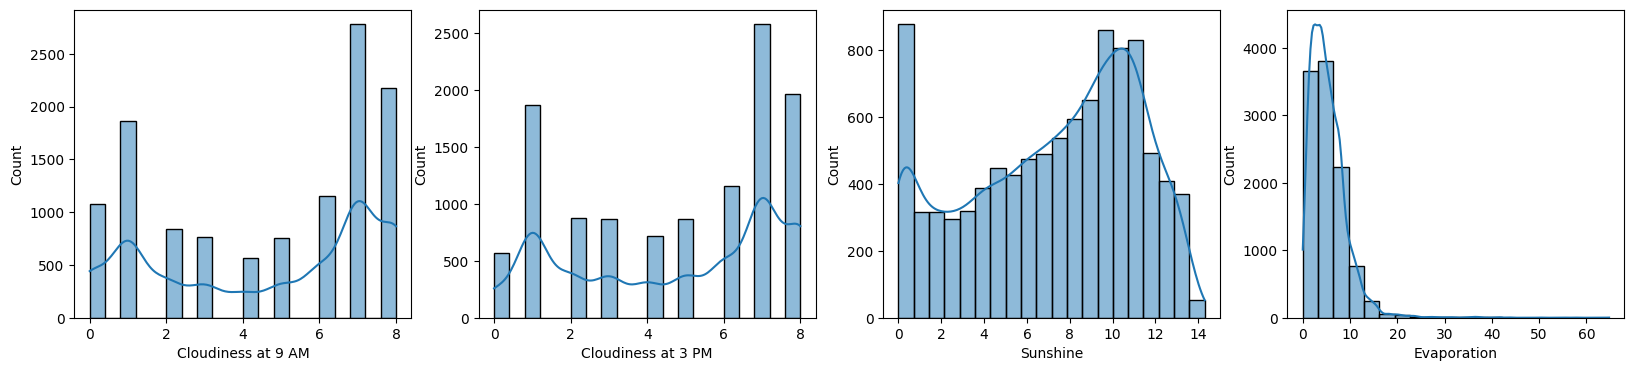

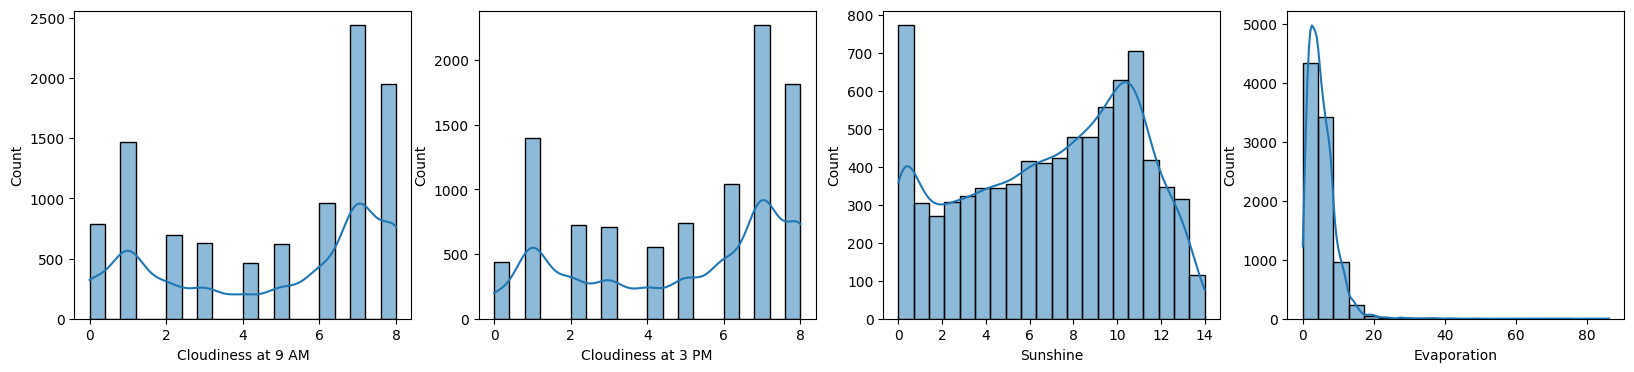

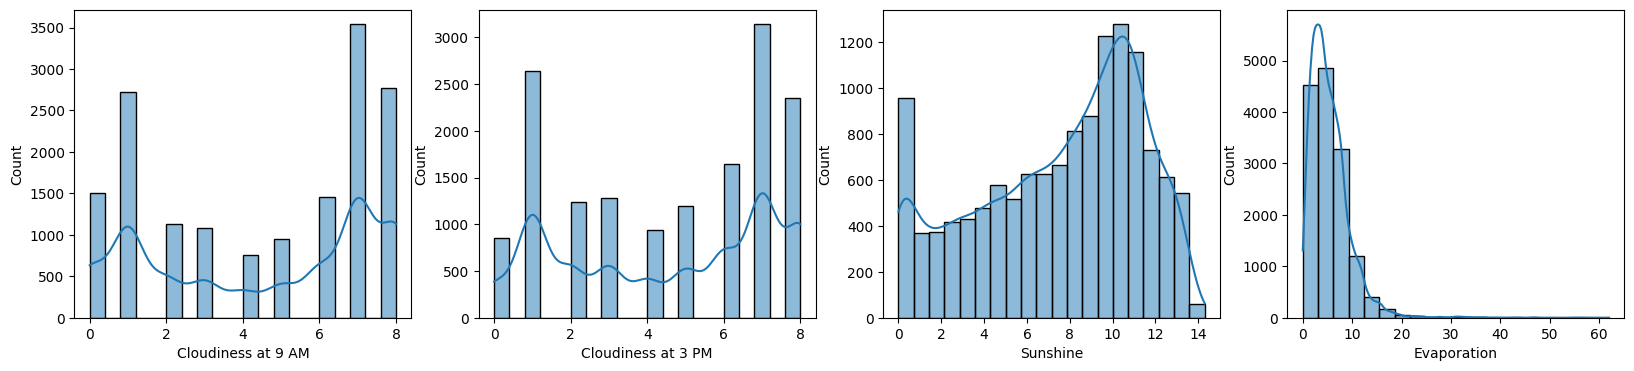

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test1["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test1["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test1["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test1["Evaporation"], bins=20, kde=True,ax=axes[3])


f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test2["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test2["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test2["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test2["Evaporation"], bins=20, kde=True,ax=axes[3])


f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test3["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test3["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test3["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test3["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
#df_test["Cloudiness at 9 AM"] = cloudiness_at_9_am_imputer.transform(df_test[["Cloudiness at 9 AM"]])
#df_test["Cloudiness at 3 PM"] = cloudiness_at_3_pm_imputer.transform(df_test[["Cloudiness at 3 PM"]])
#df_test["Sunshine"] = sunshine_imputer.transform(df_test[["Sunshine"]])
#df_test["Evaporation"] = evaporation_imputer.transform(df_test[["Evaporation"]])

columns_to_fill = ["Cloudiness at 9 AM", "Cloudiness at 3 PM"]

def fill_columns(df, columns):
  df[columns] = df[columns].ffill()
  df[columns] = df[columns].bfill()

df_test1.update(cloudiness_at_9_am_median_sample1,overwrite=False)
df_test1.update(cloudiness_at_3_pm_median_sample1,overwrite=False)
fill_columns(df_test1, columns_to_fill)
df_test1.update(sunshine_mean_sample1,overwrite=False)
df_test1.update(evaporation_mean_sample1,overwrite=False)

df_test2.update(cloudiness_at_9_am_median_sample2,overwrite=False)
df_test2.update(cloudiness_at_3_pm_median_sample2,overwrite=False)
df_test2.update(sunshine_mean_sample2,overwrite=False)
df_test2.update(evaporation_mean_sample2,overwrite=False)


df_test3.update(cloudiness_at_9_am_median_sample3,overwrite=False)
df_test3.update(cloudiness_at_3_pm_median_sample3,overwrite=False)
df_test3.update(sunshine_mean_sample3,overwrite=False)
df_test3.update(evaporation_mean_sample3,overwrite=False)

<Axes: xlabel='Evaporation', ylabel='Count'>

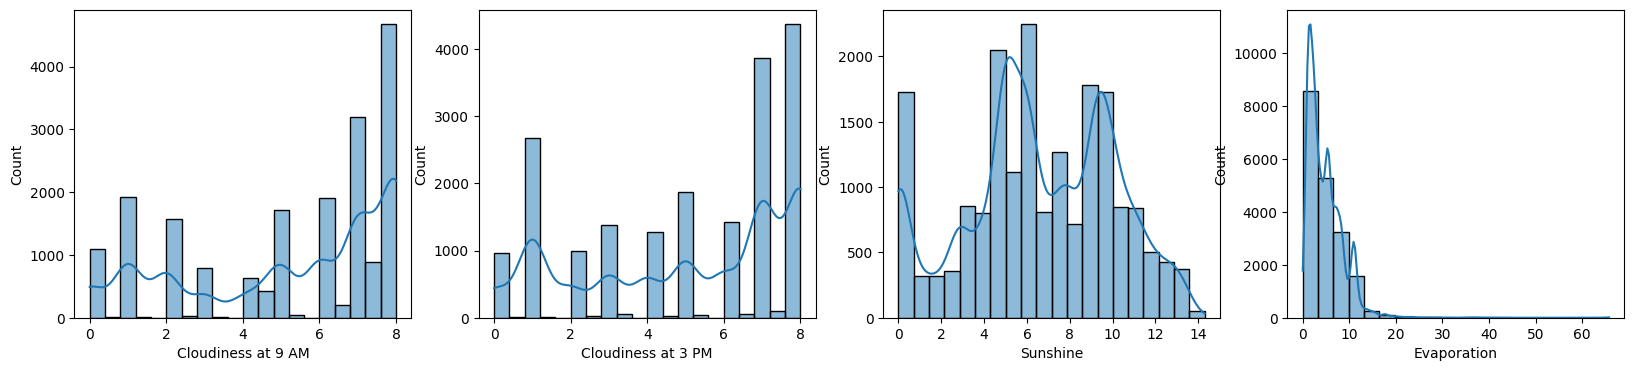

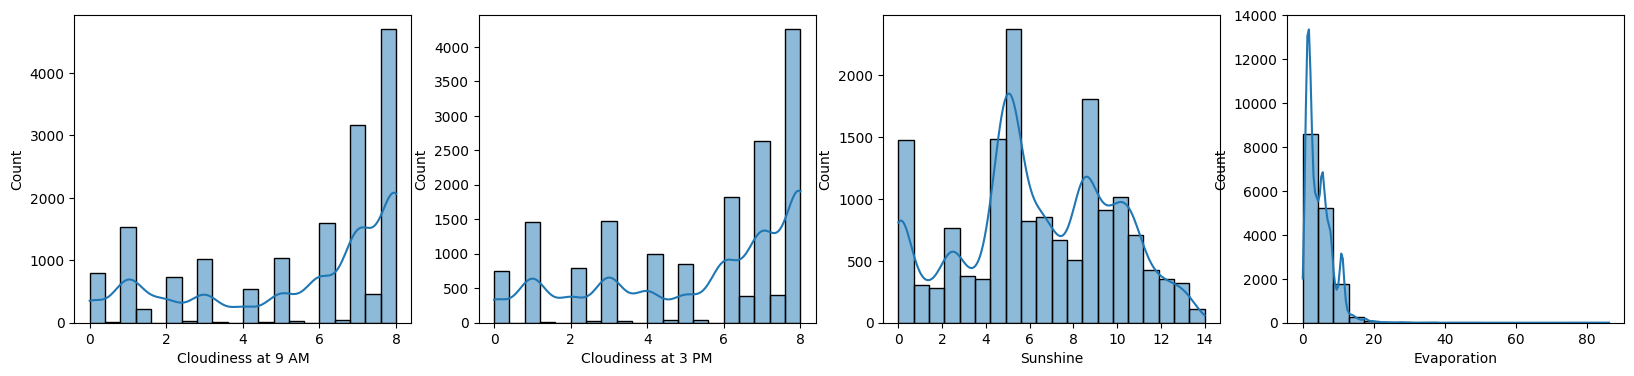

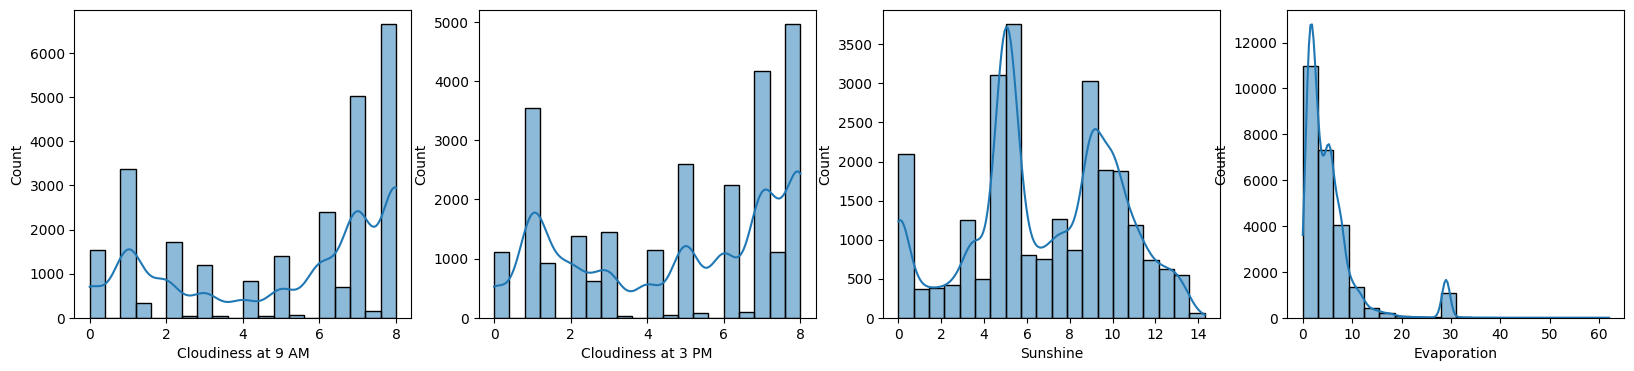

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test1["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test1["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test1["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test1["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test2["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test2["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test2["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test2["Evaporation"], bins=20, kde=True,ax=axes[3])

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test3["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test3["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test3["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test3["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
print(df_test1[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())
print(df_test2[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())
print(df_test3[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum())

Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64
Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64
Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64


In [ ]:
print(df_test1.isnull().sum().sum())
print(df_test2.isnull().sum().sum())
print(df_test3.isnull().sum().sum())

0
0
0


In [ ]:
null_proportions_df_test1 = df_test1.isnull().mean()
null_percentages_df_test1 = null_proportions_df_test1 * 100
print("Percentage of null values(df_test1) in each column : ")
for column, percentage in null_percentages_df_test1.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test2 = df_test2.isnull().mean()
null_percentages_df_test2 = null_proportions_df_test2 * 100
print("Percentage of null values(df_test2) in each column : ")
for column, percentage in null_percentages_df_test2.items():
  print(f"{column}: {percentage:.2f}%")

print("--------------------------------------")
null_proportions_df_test3 = df_test3.isnull().mean()
null_percentages_df_test3 = null_proportions_df_test3 * 100
print("Percentage of null values(df_test3) in each column : ")
for column, percentage in null_percentages_df_test3.items():
  print(f"{column}: {percentage:.2f}%")


Percentage of null values(df_test1) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 0.00%
Sunshine: 0.00%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 0.00%
Gust Trajectory at  3 PM: 0.00%
Air Velocity at  9 AM: 0.00%
Air Velocity at  3 PM: 0.00%
Moisture Level at 9 AM: 0.00%
Moisture Level at 3 PM: 0.00%
Atmospheric Pressure at 9 AM: 0.00%
Atmospheric Pressure at 3 PM: 0.00%
Cloudiness at 9 AM: 0.00%
Cloudiness at 3 PM: 0.00%
Recorded Temperature at 9 AM: 0.00%
Recorded Temperature at 3 PM: 0.00%
Rain that day: 0.00%
datetime: 0.00%
Day: 0.00%
Rain the day after: 0.00%
--------------------------------------
Percentage of null values(df_test2) in each column : 
Minimum Temperature: 0.00%
Maximum Temperature: 0.00%
Rainfall: 0.00%
Evaporation: 0.00%
Sunshine: 0.00%
Gust Trajectory: 0.00%
Air Velocity: 0.00%
Gust Trajectory at  9 AM: 0.00%
Gust Trajectory at  3 PM: 0.00%
Air Velocity at  9 AM: 0.00%
Air Velocity

In [ ]:
df_test1 = df_test1.reset_index()
df_test2 = df_test2.reset_index()
df_test3 = df_test3.reset_index()

### Encodings

### Train Encoding

In [ ]:
label_encoder = LabelEncoder()
# for sample 1
## to plot heat map we should declare numerical_df
numerical_df_train1 = df_train1.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1)

numerical_df_train1['Rain that day'] =  label_encoder.fit_transform(numerical_df_train1['Rain that day'])
numerical_df_train1["Rain the day after"] = label_encoder.fit_transform(numerical_df_train1["Rain the day after"])




df_train1["Weather Station"] = label_encoder.fit_transform(df_train1["Weather Station"])
df_train1["Gust Trajectory"] = label_encoder.fit_transform(df_train1["Gust Trajectory"])
df_train1["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_train1["Gust Trajectory at  9 AM"])
df_train1["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_train1["Gust Trajectory at  3 PM"])
df_train1['Rain that day'] =  label_encoder.fit_transform(df_train1['Rain that day'])
df_train1["Rain the day after"] = label_encoder.fit_transform(df_train1["Rain the day after"])
df_train1 = df_train1.drop("datetime", axis=1)



# for sample 2
## to plot heat map we should declare numerical_df
numerical_df_train2 = df_train2.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1)

numerical_df_train2['Rain that day'] =  label_encoder.fit_transform(numerical_df_train2['Rain that day'])
numerical_df_train2["Rain the day after"] = label_encoder.fit_transform(numerical_df_train2["Rain the day after"])


#data_to_encode = df_train[["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]]
#encoder = OneHotEncoder(dtype='int')
#encoded_data = encoder.fit_transform(data_to_encode)
#encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]))
#df_train = pd.concat([df_train.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1), encoded_df], axis=1)

df_train2["Weather Station"] = label_encoder.fit_transform(df_train2["Weather Station"])
df_train2["Gust Trajectory"] = label_encoder.fit_transform(df_train2["Gust Trajectory"])
df_train2["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_train2["Gust Trajectory at  9 AM"])
df_train2["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_train2["Gust Trajectory at  3 PM"])
df_train2['Rain that day'] =  label_encoder.fit_transform(df_train2['Rain that day'])
df_train2["Rain the day after"] = label_encoder.fit_transform(df_train2["Rain the day after"])
df_train2 = df_train2.drop("datetime", axis=1)



## to plot heat map we should declare numerical_df
numerical_df_train3 = df_train3.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1)

numerical_df_train3['Rain that day'] =  label_encoder.fit_transform(numerical_df_train3['Rain that day'])
numerical_df_train3["Rain the day after"] = label_encoder.fit_transform(numerical_df_train3["Rain the day after"])


#data_to_encode = df_train[["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]]
#encoder = OneHotEncoder(dtype='int')
#encoded_data = encoder.fit_transform(data_to_encode)
#encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]))
#df_train = pd.concat([df_train.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1), encoded_df], axis=1)

df_train3["Weather Station"] = label_encoder.fit_transform(df_train3["Weather Station"])
df_train3["Gust Trajectory"] = label_encoder.fit_transform(df_train3["Gust Trajectory"])
df_train3["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_train3["Gust Trajectory at  9 AM"])
df_train3["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_train3["Gust Trajectory at  3 PM"])
df_train3['Rain that day'] =  label_encoder.fit_transform(df_train3['Rain that day'])
df_train3["Rain the day after"] = label_encoder.fit_transform(df_train3["Rain the day after"])
df_train3 = df_train3.drop("datetime", axis=1)



In [ ]:
df_train1

Weather Station  Year  Month  Minimum Temperature  Maximum Temperature  \
0                    1  2014      2            17.200000                 19.4   
1                   19  2017      3            20.000000                 27.1   
2                    3  2012      7            14.800000                 16.4   
3                   16  2016      1             4.400000                 16.4   
4                   29  2014      8             4.500000                 17.0   
...                ...   ...    ...                  ...                  ...   
76499               46  2011      2            18.800000                 27.7   
76500               29  2009      5             3.800000                 16.2   
76501               38  2016      8            10.900000                 15.4   
76502                9  2012      3             9.900000                 21.2   
76503                9  2017      6             2.266667                 14.1   

       Rainfall  Evaporation  Sunshine  Gust Trajectory  Air Velocity  ...  \
0      0.100000          4.8  8.400000               13          19.0  ...   
1      4.800000          1.2  5.000000                1          22.0  ...   
2      2.000000          1.0  6.130000                6          33.0  ...   
3      0.000000          1.2  5.000000                2          28.0  ...   
4      0.200000          2.2  2.868750                0          30.0  ...   
...         ...          ...       ...              ...           ...  ...   
76499  3.600000          6.6  9.000000               10          30.0  ...   
76500  0.200000          1.4  4.740000               14          31.0  ...   
76501  8.600000          2.4  7.841667                9          20.0  ...   
76502  0.000000          0.8  5.014286               10          44.0  ...   
76503  2.897501          0.8  5.014286                6          56.0  ...   

       Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                        57.0                        1017.1   
1                        78.0                        1017.8   
2                        89.0                        1014.9   
3                        50.0                        1029.1   
4                        56.0                        1029.8   
...                       ...                           ...   
76499                    54.0                        1017.3   
76500                    55.0                        1029.2   
76501                    85.0                        1016.9   
76502                    51.0                        1027.1   
76503                    83.0                        1018.5   

       Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                            1017.8                 6.0                 6.0   
1                            1015.8                 6.0                 1.0   
2                            1013.3                 7.0                 8.0   
3                            1026.3                 8.0                 8.0   
4                            1027.7                 8.0                 0.0   
...                             ...                 ...                 ...   
76499                        1014.4                 6.0                 5.0   
76500                        1025.4                 1.0                 2.0   
76501                        1016.7                 5.0                 7.0   
76502                        1022.1                 2.0                 0.0   
76503                        1015.3                 7.0                 8.0   

       Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
0                              18.5                          18.5   
1                              25.4                          25.4   
2                              15.5                          15.5   
3                              15.5                          15.5   
4                              16.6           

In [ ]:
df_train2

Weather Station  Year  Month  Minimum Temperature  Maximum Temperature  \
0                   40  2013      6                  7.6                 19.6   
1                   39  2011      7                  7.7                 12.1   
2                   35  2014      2                 14.9                 18.3   
3                   47  2009      9                 20.8                 30.1   
4                   42  2014      1                 21.2                 33.5   
...                ...   ...    ...                  ...                  ...   
63748                5  2017      1                 25.7                 31.5   
63749               46  2014     12                 20.4                 24.7   
63750               12  2013     10                  5.5                 21.7   
63751               36  2013      8                  8.8                 23.0   
63752               29  2011     11                 18.4                 18.4   

       Rainfall  Evaporation   Sunshine  Gust Trajectory  Air Velocity  ...  \
0           0.0          2.2   3.400000               14          39.0  ...   
1           1.6          1.2   1.500000               15          24.0  ...   
2           0.0          5.5   8.433333                4          19.0  ...   
3           0.4          7.4  10.300000                0          41.0  ...   
4           0.0         11.0   4.766667               11          61.0  ...   
...         ...          ...        ...              ...           ...  ...   
63748       0.0          4.8   4.000000               11          26.0  ...   
63749      27.0          9.8   0.800000                9          30.0  ...   
63750       0.0          1.4   4.353333                6          28.0  ...   
63751       0.0          5.5   8.433333                0          43.0  ...   
63752       5.0          7.0   4.600000               13          70.0  ...   

       Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                        94.0                        1015.2   
1                        99.0                        1015.9   
2                        66.0                        1022.2   
3                        41.0                        1019.1   
4                        82.0                        1003.0   
...                       ...                           ...   
63748                    87.0                        1009.1   
63749                    76.0                        1009.1   
63750                    50.0                        1018.4   
63751                    29.0                        1022.4   
63752                    66.0                        1013.1   

       Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                            1011.7                 6.0                 8.0   
1                            1015.5                 8.0                 3.0   
2                            1021.8                 8.0                 8.0   
3                            1015.9                 3.0                 1.0   
4                            1003.4                 1.0                 8.0   
...                             ...                 ...                 ...   
63748                        1007.0                 5.0                 7.0   
63749                        1008.2                 8.0                 7.0   
63750                        1013.2                 8.0                 3.0   
63751                        1018.8                 8.0                 8.0   
63752                        1010.9                 8.0                 7.0   

       Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
0                              14.7                          14.7   
1                              11.2                          11.2   
2                              17.8                          17.8   
3                              28.8                          28.8   
4                              21.

In [ ]:
df_train3

Weather Station  Year  Month  Minimum Temperature  \
0                    38  2010      3                 16.4   
1                    31  2015      3                 21.1   
2                    17  2013     12                 13.3   
3                    45  2015      6                 -1.4   
4                    37  2010     12                 12.5   
...                 ...   ...    ...                  ...   
102001               27  2013      4                  6.2   
102002                1  2015      8                  7.6   
102003               21  2012      6                  3.1   
102004                6  2015      4                 19.0   
102005               37  2014     11                 20.2   

        Maximum Temperature  Rainfall  Evaporation   Sunshine  \
0                      33.8       0.0          2.1   8.833333   
1                      24.5       0.0          7.2   0.900000   
2                      24.5       0.0          1.2   5.188235   
3                      13.5       0.0          2.4   0.000000   
4                      35.9       0.0          8.0  13.600000   
...                     ...       ...          ...        ...   
102001                 18.0       0.2          1.2   4.700000   
102002                 18.8       0.0          0.4   8.800000   
102003                 12.8      12.2          4.2   4.000000   
102004                 25.9     128.4          6.0  10.025000   
102005                 27.0       0.0         14.6   0.200000   

        Gust Trajectory  Air Velocity  ...  Moisture Level at 3 PM  \
0                     4          41.0  ...                    32.0   
1                    11          35.0  ...                    79.0   
2                    13          41.0  ...                    51.0   
3                     2          20.0  ...                    61.0   
4                    13          44.0  ...                    12.0   
...                 ...           ...  ...                     ...   
102001               13          26.0  ...                    65.0   
102002               13          19.0  ...                    65.0   
102003               10          48.0  ...                    95.0   
102004               10          56.0  ...                    78.0   
102005               15          35.0  ...                    37.0   

        Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                            1021.90                        1017.9   
1                            1017.70                        1016.5   
2                            1029.15                        1026.9   
3                            1033.50                        1030.4   
4                            1015.90                        1013.3   
...                              ...                           ...   
102001                       1019.10                        1017.9   
102002                       1025.60                        1022.7   
102003                       1014.00                        1013.0   
102004                       1023.00                        1019.2   
102005                       1008.40                        1009.1   

        Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
0                      7.0                 7.5                          30.3   
1                      7.0                 7.0                          24.0   
2                      3.0                 5.0                          24.3   
3                      8.0                 4.0                          12.4   
4                      0.0                 1.0                          35.0   
...                    ...                 ...                           ...   
102001                 8.0                 7.0                          16.9   
102002                 1.0                 6.0                          10.2   
102003                 6.0                 8.0                          10.2   
102004      

### Test Encoding

In [ ]:
df_test1["Weather Station"] = label_encoder.fit_transform(df_test1["Weather Station"])
df_test1["Gust Trajectory"] = label_encoder.fit_transform(df_test1["Gust Trajectory"])
df_test1["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_test1["Gust Trajectory at  9 AM"])
df_test1["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_test1["Gust Trajectory at  3 PM"])
df_test1['Rain that day'] =  label_encoder.fit_transform(df_test1['Rain that day'])
df_test1["Rain the day after"] = label_encoder.fit_transform(df_test1["Rain the day after"])
df_test1 = df_test1.drop("datetime", axis=1)



df_test2["Weather Station"] = label_encoder.fit_transform(df_test2["Weather Station"])
df_test2["Gust Trajectory"] = label_encoder.fit_transform(df_test2["Gust Trajectory"])
df_test2["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_test2["Gust Trajectory at  9 AM"])
df_test2["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_test2["Gust Trajectory at  3 PM"])
df_test2['Rain that day'] =  label_encoder.fit_transform(df_test2['Rain that day'])
df_test2["Rain the day after"] = label_encoder.fit_transform(df_test2["Rain the day after"])
df_test2 = df_test2.drop("datetime", axis=1)



df_test3["Weather Station"] = label_encoder.fit_transform(df_test3["Weather Station"])
df_test3["Gust Trajectory"] = label_encoder.fit_transform(df_test3["Gust Trajectory"])
df_test3["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_test3["Gust Trajectory at  9 AM"])
df_test3["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_test3["Gust Trajectory at  3 PM"])
df_test3['Rain that day'] =  label_encoder.fit_transform(df_test3['Rain that day'])
df_test3["Rain the day after"] = label_encoder.fit_transform(df_test3["Rain the day after"])
df_test3 = df_test3.drop("datetime", axis=1)



In [ ]:
df_test1

Weather Station  Year  Month  Minimum Temperature  Maximum Temperature  \
0                    7  2010     11                  9.0                 17.8   
1                   15  2010     11                 20.4                 34.9   
2                   38  2016      9                  8.5                 14.6   
3                   36  2013     11                 16.5                 32.0   
4                   25  2012      9                 15.6                 23.2   
...                ...   ...    ...                  ...                  ...   
19122               27  2011      8                 12.3                 16.4   
19123               16  2015      5                  5.4                  9.6   
19124               41  2011     10                 12.0                 22.4   
19125               19  2011     10                 12.8                 24.3   
19126               48  2017      1                 15.5                 39.1   

       Rainfall  Evaporation  Sunshine  Gust Trajectory  Air Velocity  ...  \
0           0.0          5.6  3.500000               11          54.0  ...   
1           0.0          8.8  8.100000                3          59.0  ...   
2          12.8          2.4  7.841667               13          72.0  ...   
3          11.4          5.4  9.227778               12          61.0  ...   
4           0.0          4.6  8.900000                7          28.0  ...   
...         ...          ...       ...              ...           ...  ...   
19122       7.8          3.2  2.600000                7          46.0  ...   
19123       0.0          1.2  5.000000               15          76.0  ...   
19124       0.0         11.0  6.033333                9          30.0  ...   
19125       0.0          1.2  5.000000                5          48.0  ...   
19126       0.0          1.6  7.383333               14          74.0  ...   

       Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                        69.0                        1009.9   
1                        22.0                        1015.5   
2                        84.0                        1005.3   
3                        58.0                        1011.0   
4                        59.0                        1014.7   
...                       ...                           ...   
19122                    77.0                        1014.3   
19123                    93.0                        1029.1   
19124                    51.0                        1014.4   
19125                    70.0                        1028.4   
19126                    19.0                        1011.9   

       Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                            1010.3                 3.0                 7.0   
1                            1013.4                 3.0                 5.0   
2                            1005.6                 5.0                 7.0   
3                            1005.7                 8.0                 8.0   
4                            1013.3                 7.0                 2.0   
...                             ...                 ...                 ...   
19122                        1015.2                 5.0                 7.0   
19123                        1026.3                 8.0                 8.0   
19124                        1011.2                 7.5                 8.0   
19125                        1023.8                 6.0                 1.0   
19126                        1007.1                 6.0                 1.0   

       Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
0                              15.9                          14.3   
1                              26.1                          32.4   
2                               9.6                           9.8   
3                              17.1                          28.6   
4                              19.4           

In [ ]:
df_test2

Weather Station  Year  Month  Minimum Temperature  Maximum Temperature  \
0                   42  2016     10                 16.1                 24.8   
1                    5  2010      4                 26.0                 33.1   
2                   34  2009     11                 14.5                 21.2   
3                   29  2013      9                  8.1                 17.6   
4                    6  2012      7                 13.8                 20.8   
...                ...   ...    ...                  ...                  ...   
15934                5  2010     12                 23.8                 30.5   
15935               31  2014     11                 21.8                 24.7   
15936               35  2010      4                 11.0                 25.5   
15937               38  2016      3                 13.7                 25.3   
15938               32  2016     10                 15.8                 27.1   

       Rainfall  Evaporation  Sunshine  Gust Trajectory  Air Velocity  ...  \
0           0.0         11.0  4.766667               15          33.0  ...   
1           0.0          6.4  5.300000                7          48.0  ...   
2           3.0          5.5  8.433333               11          28.0  ...   
3           0.0          1.2  5.000000               15          56.0  ...   
4           0.0          6.6  9.786667               10          63.0  ...   
...         ...          ...       ...              ...           ...  ...   
15934      18.0          4.8  1.400000               11          44.0  ...   
15935       5.0          6.6  5.600000               12          52.0  ...   
15936       0.0          5.5  8.433333                3          22.0  ...   
15937       0.0          2.2  8.988889               14          26.0  ...   
15938       0.0          7.4  8.400000                7          56.0  ...   

       Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                        54.0                        1015.6   
1                        80.0                        1008.2   
2                        64.0                        1027.9   
3                        50.0                        1023.9   
4                        61.0                        1021.2   
...                       ...                           ...   
15934                    72.0                        1006.5   
15935                    56.0                        1013.0   
15936                    51.0                        1025.8   
15937                    60.0                        1022.7   
15938                    55.0                        1018.8   

       Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                            1012.9                 8.0                 2.0   
1                            1006.5                 6.0                 7.0   
2                            1026.8                 8.0                 8.0   
3                            1022.8                 4.0                 6.0   
4                            1019.9                 3.0                 3.0   
...                             ...                 ...                 ...   
15934                        1003.9                 7.0                 7.0   
15935                        1016.4                 7.0                 5.0   
15936                        1021.1                 8.0                 8.0   
15937                        1018.6                 6.0                 8.0   
15938                        1012.4                 5.0                 7.0   

       Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
0                              21.3                          23.3   
1                              29.9                          26.8   
2                              18.0                          19.7   
3                              13.9                          16.2   
4                              17.9           

In [ ]:
df_test3

Weather Station  Year  Month  Minimum Temperature  Maximum Temperature  \
0                   42  2009      7                  9.0                 17.0   
1                    9  2015      6                  0.6                 12.4   
2                   23  2010     11                 14.1                 33.9   
3                   19  2012     11                 20.2                 28.6   
4                   13  2010      6                  4.4                 12.9   
...                ...   ...    ...                  ...                  ...   
25497               11  2011      8                  3.8                 12.7   
25498               15  2010     11                  6.3                 15.3   
25499                6  2016     12                 24.9                 30.8   
25500               25  2015      9                 13.0                 19.2   
25501               38  2011      1                 15.9                 27.6   

       Rainfall  Evaporation   Sunshine  Gust Trajectory  Air Velocity  ...  \
0           0.6         29.0   4.775000               15          72.0  ...   
1           0.2          0.9   4.966667                6          20.0  ...   
2           0.0          9.8  12.900000                8          52.0  ...   
3           1.6          1.2   5.188235                4          37.0  ...   
4           5.8          1.6   7.300000               11          26.0  ...   
...         ...          ...        ...              ...           ...  ...   
25497       2.8          1.2   2.000000                3          35.0  ...   
25498       0.0          0.4   2.400000               10          43.0  ...   
25499       0.0          6.0  10.025000                5          41.0  ...   
25500       8.0          3.0   8.600000               11          50.0  ...   
25501       0.0          2.1   8.833333                9          39.0  ...   

       Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                        73.0                        1012.2   
1                        69.0                        1021.9   
2                        13.0                        1016.0   
3                        72.0                        1016.9   
4                        48.0                        1026.7   
...                       ...                           ...   
25497                    63.0                        1014.5   
25498                    49.0                        1027.6   
25499                    81.0                        1006.3   
25500                    62.0                        1020.7   
25501                    63.0                        1011.1   

       Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                            1016.0                 4.0                 8.0   
1                            1018.0                 8.0                 7.0   
2                            1010.7                 1.0                 2.0   
3                            1014.0                 6.0                 1.5   
4                            1025.3                 1.0                 2.0   
...                             ...                 ...                 ...   
25497                        1012.1                 4.0                 6.0   
25498                        1025.2                 7.0                 7.0   
25499                        1003.1                 1.0                 1.0   
25500                        1021.6                 3.0                 5.0   
25501                        1009.4                 7.0                 7.5   

       Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  \
0                              13.7                          12.1   
1                               3.8                          12.0   
2                              28.0                          33.7   
3                              22.3                          26.9   
4                               6.

## EDA

### Heat Map for df_train1

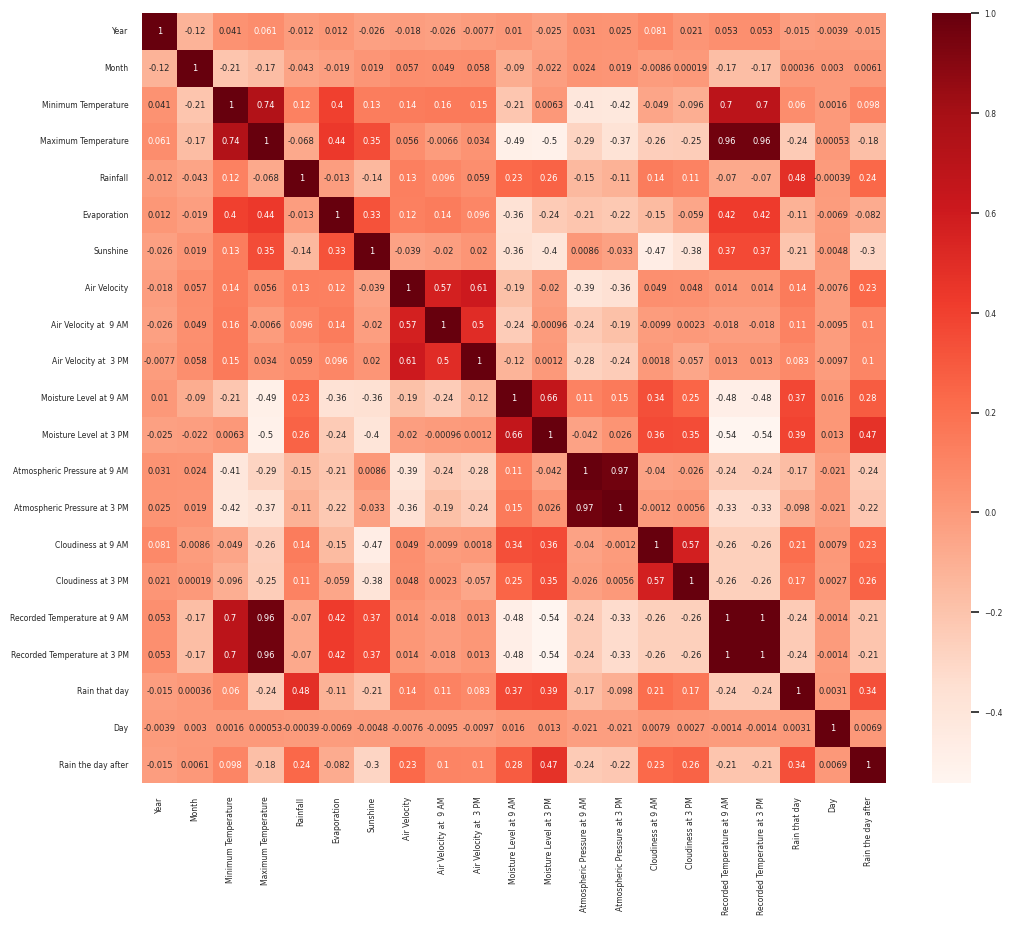

In [ ]:
#Using Pearson Correlation
sns.set(font_scale=0.5)
plt.figure(figsize=(12,10))
cor = numerical_df_train1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Heat Map for df_train2

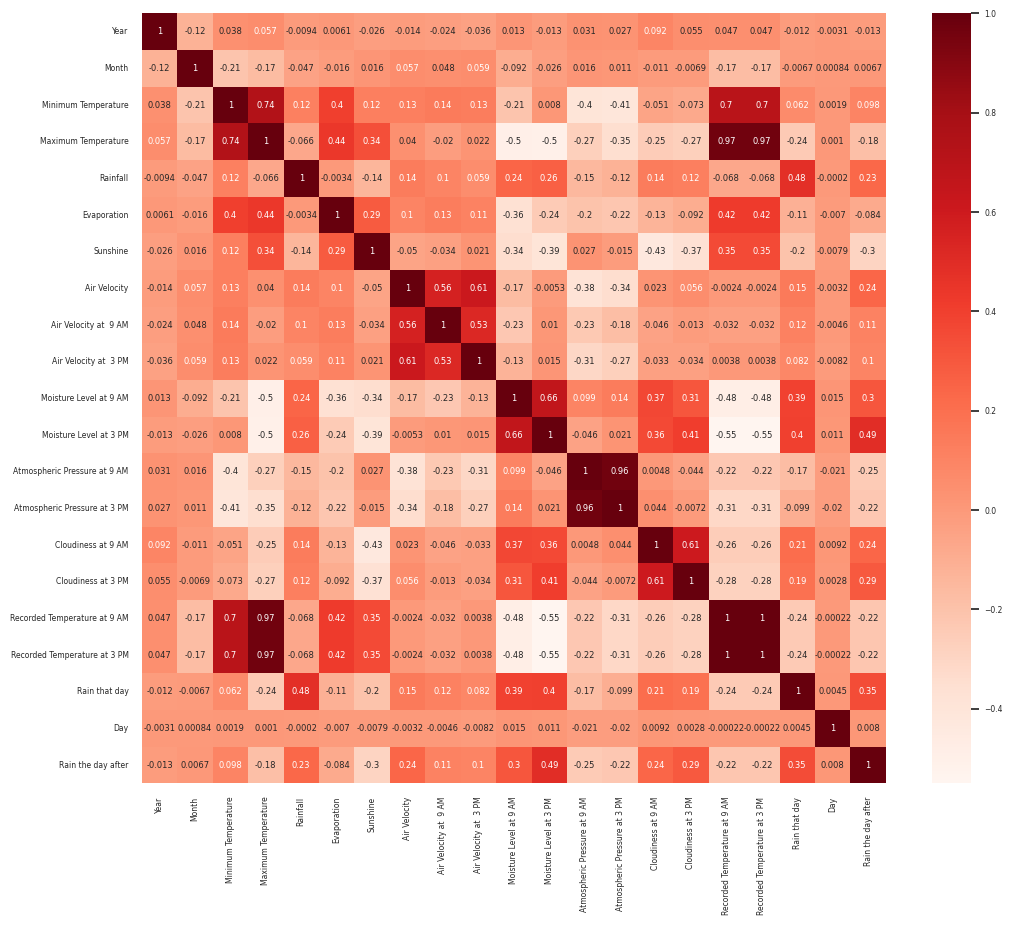

In [ ]:
#Using Pearson Correlation
sns.set(font_scale=0.5)
plt.figure(figsize=(12,10))
cor = numerical_df_train2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Heat Map for df_train3

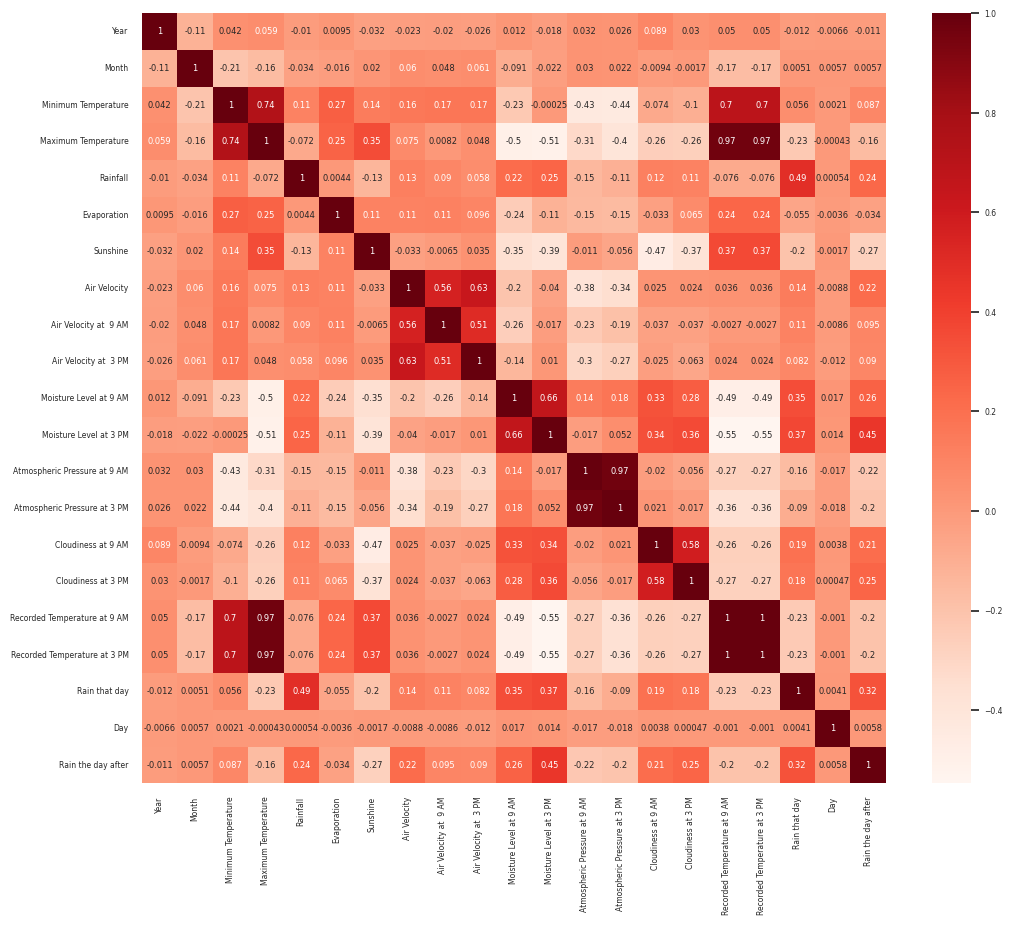

In [ ]:
#Using Pearson Correlation
sns.set(font_scale=0.5)
plt.figure(figsize=(12,10))
cor = numerical_df_train3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Outliers and Noises Removal

In [ ]:
columns_to_check = [
    'Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
    'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM',
    'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
    'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM',
    'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'
]
for column in columns_to_check:
  Q1 = df_train1[column].quantile(0.1)
  Q3 = df_train1[column].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_train1 = df_train1[(df_train1[column] >= lower_bound) & (df_train1[column] <= upper_bound)]



for column in columns_to_check:
  Q1 = df_train2[column].quantile(0.1)
  Q3 = df_train2[column].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_train2 = df_train2[(df_train2[column] >= lower_bound) & (df_train2[column] <= upper_bound)]


for column in columns_to_check:
  Q1 = df_train3[column].quantile(0.1)
  Q3 = df_train3[column].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_train3 = df_train3[(df_train3[column] >= lower_bound) & (df_train3[column] <= upper_bound)]

In [ ]:
#continuous_columns = [
 #   'Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
  #  'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM',
  #  'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
  #  'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM',
  #  'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'
#]
#for column in continuous_columns:
#  df_train[column] = df_train[column].rolling(window=7, min_periods=1).mean()
#df_train

# Predict and Train

In [ ]:
X_train1 = df_train1.drop("Rain the day after", axis=1)
Y_train1 = df_train1['Rain the day after']

X_train2 = df_train2.drop("Rain the day after", axis=1)
Y_train2 = df_train2['Rain the day after']

X_train3 = df_train3.drop("Rain the day after", axis=1)
Y_train3 = df_train3['Rain the day after']

In [ ]:
# fit and transform the data
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler1 = RobustScaler()
scaled_data1 = scaler1.fit_transform(X_train1)
# create a new DataFrame with the scaled data
X_train1 = pd.DataFrame(scaled_data1, columns=X_train1.columns)

scaler2 = RobustScaler()
scaled_data2 = scaler2.fit_transform(X_train2)
# create a new DataFrame with the scaled data
X_train2 = pd.DataFrame(scaled_data2, columns=X_train2.columns)

scaler3 = RobustScaler()
scaled_data3 = scaler3.fit_transform(X_train2)
# create a new DataFrame with the scaled data
X_train3 = pd.DataFrame(scaled_data3, columns=X_train3.columns)



In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=5)
#X_train = pca.fit_transform(X_train)
#X_train = pd.DataFrame(X_train)
#X_train

In [ ]:
models = {
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": tree.DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability = True)
}

In [ ]:
params = {
    "KNearest": {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    "DecisionTreeClassifier": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,15,1)),"min_samples_leaf": list(range(5,7,1))},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
}


In [ ]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(model, params, X_train, Y_train):
    grid_model = GridSearchCV(model, params, cv = 5)
    grid_model.fit(X_train, Y_train)
    best_model = grid_model.best_estimator_
    cv_results = grid_model.cv_results_
    return best_model, cv_results

In [ ]:
X_test1 = df_test1.drop("Rain the day after", axis=1)
Y_test1 = df_test1['Rain the day after']

X_test2 = df_test2.drop("Rain the day after", axis=1)
Y_test2 = df_test2['Rain the day after']

X_test3 = df_test3.drop("Rain the day after", axis=1)
Y_test3 = df_test3['Rain the day after']

In [ ]:
scaled_test_data1 = scaler1.transform(X_test1)
X_test1 = pd.DataFrame(scaled_test_data1, columns=X_test1.columns)

scaled_test_data2 = scaler2.transform(X_test2)
X_test2 = pd.DataFrame(scaled_test_data2, columns=X_test2.columns)

scaled_test_data3 = scaler3.transform(X_test3)
X_test3 = pd.DataFrame(scaled_test_data3, columns=X_test3.columns)


### PCA section for Diminsionality Reduction

In [ ]:
#X_test = pca.transform(X_test)
#X_test = pd.DataFrame(X_test)
#X_test

### Train and Predict Section on sample 1


In [ ]:
best_Classifier1 = []
cv_results_list1 = []
for model_name, model in models.items():
  print(f"Training {model_name} on sample 1")
  best_model1, cv_results1 = gridsearch(model, params[model_name], X_train1, Y_train1)
  best_Classifier1.append((f"{model_name}_sample1", best_model1))
  cv_results_list1.append((f"{model_name}_sample1", cv_results1))



  Y_pred1 = best_model1.predict(X_test1)
  accuracy1 = accuracy_score(Y_test1, Y_pred1)
  print(f'Accuracy for {model_name} on sample 1: {accuracy1: .2f}')
  print(f'Classification Report for {model_name} on sample 1: \n{classification_report(Y_test1, Y_pred1)}\n')


# Print cross-validation results for best models on sample 1
print("\nCross-validation results for best models on sample 1:")
for name, cv_results1 in cv_results_list1:
    print(f"Cross-validation results for {name}:")
    for mean_score, param_set in zip(cv_results1['mean_test_score'], cv_results1['params']):
        print(f"Mean CV score: {mean_score:.3f} for parameters: {param_set}")
    print()



Training KNearest on sample 1
Accuracy for KNearest on sample 1:  0.77
Classification Report for KNearest on sample 1: 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     12881
           1       0.73      0.48      0.58      6246

    accuracy                           0.77     19127
   macro avg       0.76      0.70      0.71     19127
weighted avg       0.77      0.77      0.76     19127


Training DecisionTreeClassifier on sample 1
Accuracy for DecisionTreeClassifier on sample 1:  0.80
Classification Report for DecisionTreeClassifier on sample 1: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     12881
           1       0.74      0.59      0.66      6246

    accuracy                           0.80     19127
   macro avg       0.78      0.75      0.76     19127
weighted avg       0.79      0.80      0.79     19127


Training Support Vector Classifier on sample 1


### Train and Predict Section on sample 2


In [ ]:
best_Classifier2 = []
cv_results_list2 = []
for model_name, model in models.items():
  print(f"Training {model_name} on sample 1")
  best_model2, cv_results2 = gridsearch(model, params[model_name], X_train2, Y_train2)
  best_Classifier2.append((f"{model_name}_sample1", best_model2))
  cv_results_list2.append((f"{model_name}_sample1", cv_results2))



  Y_pred2 = best_model2.predict(X_test2)
  accuracy2 = accuracy_score(Y_test2, Y_pred2)
  print(f'Accuracy for {model_name} on sample 1: {accuracy2: .2f}')
  print(f'Classification Report for {model_name} on sample 1: \n{classification_report(Y_test2, Y_pred2)}\n')


# Print cross-validation results for best models on sample 1
print("\nCross-validation results for best models on sample 1:")
for name, cv_results2 in cv_results_list2:
    print(f"Cross-validation results for {name}:")
    for mean_score, param_set in zip(cv_results2['mean_test_score'], cv_results2['params']):
        print(f"Mean CV score: {mean_score:.3f} for parameters: {param_set}")
    print()



### Train and Predict Section on sample 3


In [ ]:
best_Classifier3 = []
cv_results_list3 = []
for model_name, model in models.items():
  print(f"Training {model_name} on sample 1")
  best_model3, cv_results3 = gridsearch(model, params[model_name], X_train3, Y_train3)
  best_Classifier3.append((f"{model_name}_sample1", best_model3))
  cv_results_list3.append((f"{model_name}_sample1", cv_results3))



  Y_pred3 = best_model3.predict(X_test3)
  accuracy3 = accuracy_score(Y_test3, Y_pred3)
  print(f'Accuracy for {model_name} on sample 1: {accuracy3: .2f}')
  print(f'Classification Report for {model_name} on sample 1: \n{classification_report(Y_test3, Y_pred3)}\n')


# Print cross-validation results for best models on sample 1
print("\nCross-validation results for best models on sample 1:")
for name, cv_results3 in cv_results_list3:
    print(f"Cross-validation results for {name}:")
    for mean_score, param_set in zip(cv_results2['mean_test_score'], cv_results3['params']):
        print(f"Mean CV score: {mean_score:.3f} for parameters: {param_set}")
    print()

